# **Predictive Modelling and Risk Analysis in Parkinson's Disease**

<h3> <b> Import Libraries </b> <img src="https://preview.redd.it/snoovatar/avatars/nftv2_bmZ0X2VpcDE1NToxMzdfZWI5NTlhNzE1ZGZmZmU2ZjgyZjQ2MDU1MzM5ODJjNDg1OWNiMTRmZV8yMTQ1NzYzNg_rare_46f1cdb1-634f-4c1d-8344-2be06c7880d4-headshot.png?width=256&height=256&crop=smart&auto=webp&s=400ead9440c7a9f06ca4c44953f24c5b765c4aac" width=150 style="vertical-align: middle"> </h3>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
#-------------------------------------------------------------------------------------------------------#
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc,ConfusionMatrixDisplay,precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
#-------------------------------------------------------------------------------------------------------#
import xgboost as xgb
from xgboost import XGBClassifier
#-------------------------------------------------------------------------------------------------------#
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset ,random_split
import torch.optim as optim

In [2]:
df = pd.read_csv('parkinsons_disease_data.csv')

print(f" The size of the dataset is : {df.shape[0]} rows, {df.shape[1]} columns ")

 The size of the dataset is : 2105 rows, 35 columns 


In [3]:
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid




Patient Information
Patient ID
Demographic Details
Lifestyle Factors
Medical History
Clinical Measurements
Cognitive and Functional Assessments
Symptoms
Diagnosis Information
Confidential Information
Patient Information

`PatientID`: A unique identifier assigned to each patient (3058 to 5162).
Demographic Details

`Age`: The age of the patients ranges from 50 to 90 years.
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
- 0: Caucasian
- 1: African American
- 2: Asian
- 3: Other
`EducationLevel`: The education level of the patients, coded as follows:
- 0: None
- 1: High School
- 2: Bachelor's
- 3: Higher

**Lifestyle Factors**

- `BMI`: Body Mass Index of the patients, ranging from 15 to 40.
- `Smoking`: Smoking status, where 0 indicates No and 1 indicates Yes.
- `AlcoholConsumption`: Weekly alcohol consumption in units, ranging from 0 to 20.
- `PhysicalActivity`: Weekly physical activity in hours, ranging from 0 to 10.
- `DietQuality`: Diet quality score, ranging from 0 to 10.
- `SleepQuality`: Sleep quality score, ranging from 4 to 10.
**Medical History**

- `FamilyHistoryParkinsons`: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
- `TraumaticBrainInjury`: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
- `Hypertension`: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- `Diabetes`: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- `Depression`: Presence of depression, where 0 indicates No and 1 indicates Yes.
- `Stroke`: History of stroke, where 0 indicates No and 1 indicates Yes.
**Clinical Measurements**

- `SystolicBP`: Systolic blood pressure, ranging from 90 to 180 mmHg.
- `DiastolicBP`: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- `CholesterolTotal`: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- `CholesterolLDL`: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- `CholesterolHDL`: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- `CholesterolTriglycerides`: Triglycerides levels, ranging from 50 to 400 mg/dL.

**Cognitive and Functional Assessments**

- `UPDRS`: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
- `MoCA`: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- `FunctionalAssessment`: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
**Symptoms**

- `Tremor`: Presence of tremor, where 0 indicates No and 1 indicates Yes.
- `Rigidity`: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
- `Bradykinesia`: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
- `PosturalInstability`: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
- `SpeechProblems`: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
- `SleepDisorders`: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
- `Constipation`: Presence of constipation, where 0 indicates No and 1 indicates Yes.
**Diagnosis Information**

- `Diagnosis`: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
Confidential Information

- `DoctorInCharge`: This column contains confidential information about the doctor in charge, with "DrXXXConfid" as the value for all patients.
Conclusion

This dataset offers extensive insights into the factors associated with Parkinson's Disease, including demographic, lifestyle, medical, cognitive, and functional variables. It is ideal for developing predictive models, conducting statistical analyses, and exploring the complex interplay of factors contributing to Parkinson's Disease.

**Dataset Usage and Attribution Notice**

This dataset, shared by Rabie El Kharoua, is original and has never been shared before. It is made available under the CC BY 4.0 license, allowing anyone to use the dataset in any form as long as proper citation is given to the author. A DOI is provided for proper referencing. Please note that duplication of this work within Kaggle is not permitted.

**Synthetic Dataset**

This dataset is synthetic and was generated for educational purposes, making it ideal for data science and machine learning projects. It is an original dataset, owned by Mr. Rabie El Kharoua, and has not been previously shared. You are free to use it under the license outlined on the data card. The dataset is offered without any guarantees. Details about the data provider will be shared soon.

### Logistic Regression


In [4]:
df.columns 

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [6]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [7]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = df_numeric.corr()

# Get the correlation with 'Diagnosis'
correlation_with_diagnosis = correlation['Diagnosis'].sort_values(ascending=False)

# Print the result
print("Correlation with Diagnosis:\n", correlation_with_diagnosis)

Correlation with Diagnosis:
 Diagnosis                   1.000000
UPDRS                       0.398006
Tremor                      0.274370
Rigidity                    0.185611
Bradykinesia                0.184042
PosturalInstability         0.147519
Age                         0.065344
Depression                  0.059080
Diabetes                    0.057067
AlcoholConsumption          0.036699
BMI                         0.030114
Stroke                      0.028093
Constipation                0.025327
TraumaticBrainInjury        0.022964
Gender                      0.016835
CholesterolTriglycerides    0.015610
CholesterolLDL              0.014707
FamilyHistoryParkinsons     0.013363
PhysicalActivity            0.012940
Smoking                     0.005241
EducationLevel              0.004557
SystolicBP                 -0.004413
Ethnicity                  -0.005068
SleepDisorders             -0.010578
Hypertension               -0.011587
SpeechProblems             -0.012220
Cholester

## Analysis of the distribution and the outliers of each variable


Analysis of the distirbution of a column: DoctorInCharge

Class:
                Count  Perc (%) imbalance
DoctorInCharge                           
DrXXXConfid      2105     100.0    1.00:1

Imbalance Report: 1.00:1

--------------------------------------------------

Analysis of the distirbution of a column: Gender

Class:
        Count  Perc (%) imbalance
Gender                           
0        1068     50.74    1.03:1
1        1037     49.26    1.03:1

Imbalance Report: 1.03:1

--------------------------------------------------

Analysis of the distirbution of a column: Ethnicity

Class:
           Count  Perc (%) imbalance
Ethnicity                           
0           1270     60.33    6.45:1
1            425     20.19    6.45:1
3            213     10.12    6.45:1
2            197      9.36    6.45:1

Imbalance Report: 6.45:1

--------------------------------------------------

Analysis of the distirbution of a column: EducationLevel

Class:
                Count  Perc (%)

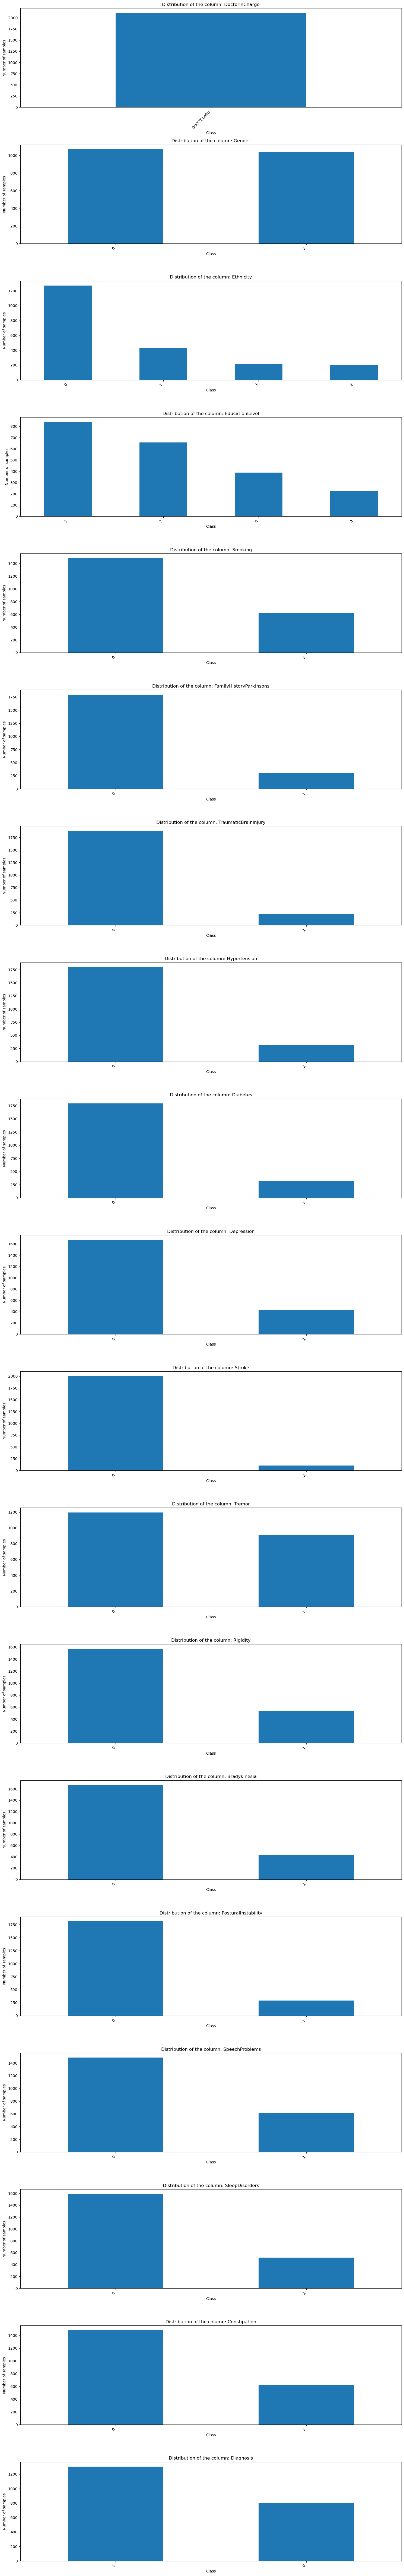

In [8]:
def analyze_class_distribution(df):
    # Dict to keep infos
    distribution_analysis = {}
    
    # dividing the columns to analise
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    numeric_categorical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                                   if df[col].nunique() < 10]  
    

    class_columns = list(categorical_columns) + numeric_categorical_columns
    
    # analysis for any column
    for column in class_columns:
        
        value_counts = df[column].value_counts()
        
        value_percentages = df[column].value_counts(normalize=True) * 100
        
        class_balance_ratio = value_counts.max() / value_counts.min()
        
        distribution_info = pd.DataFrame({
            'Count': value_counts,
            'Perc (%)': value_percentages.round(2),
        })
        
        # Informazioni aggiuntive
        distribution_info['imbalance'] = f'{class_balance_ratio:.2f}:1'
        
        distribution_analysis[column] = {
            'distribution': distribution_info,
            'imbalance_report': class_balance_ratio
        }
    
    return distribution_analysis

# Visualization of the analysis
def print_distribution_analysis(distribution_analysis):
    for column, analysis in distribution_analysis.items():
        print(f"\nAnalysis of the distirbution of a column: {column}")
        print("\nClass:")
        print(analysis['distribution'])
        print(f"\nImbalance Report: {analysis['imbalance_report']:.2f}:1\n")
        print("-" * 50)

distribution_analysis = analyze_class_distribution(df)
print_distribution_analysis(distribution_analysis)


def plot_class_distributions(distribution_analysis):
    plt.figure(figsize=(15, 5 * len(distribution_analysis)))
    
    for i, (column, analysis) in enumerate(distribution_analysis.items(), 1):
        plt.subplot(len(distribution_analysis), 1, i)
        analysis['distribution']['Count'].plot(kind='bar')
        plt.title(f'Distribution of the column: {column}')
        plt.xlabel('Class')
        plt.ylabel('Number of samples')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


plot_class_distributions(distribution_analysis)

Correlation analysis, I want to understand the correlation between all variables and the target one , diagnosis

### **1. Criteria for Selecting Relevant Variables**
- **Strength of Correlation**: In general, variables with an absolute correlation (absolute value) greater than **0.1** can be considered relevant. This serves as a starting point for selecting variables with a more evident relationship to the target variable (`Diagnosis`).
- **Theoretical Significance**: Beyond correlation values, consider variables that may be theoretically linked to the outcome, even if their correlation is low.

---

#### Positive Correlations (potential direct relationship with `Diagnosis`):
- `UPDRS` (0.398006): Very strong, likely a primary indicator.
- `Tremor` (0.274370): Relevant, potentially an important symptom.
- `Rigidity` (0.185611): Relevant, possibly a clinical marker.
- `Bradykinesia` (0.184042): Relevant, another significant clinical feature.
- `PosturalInstability` (0.147519): Relevant, related to motor control.

#### Negative Correlations (potential inverse relationship with `Diagnosis`):
- `FunctionalAssessment` (-0.225036): Relevant, suggests that better functional status is associated with a lower likelihood of diagnosis.
- `MoCA` (-0.173104): Relevant, may indicate a cognitive influence.

#### Marginal Correlations (between -0.1 and 0.1):
- `Age` (0.065344), `Depression` (0.059080), `Diabetes` (0.057067), etc., show very low correlations and might be considered less relevant. You can include them if you believe they have clinical or theoretical importance.


### Correlation Matrix 

In [19]:
correlation_matrix = df_numeric.corr()

print(correlation_matrix)

                          PatientID       Age    Gender  Ethnicity  \
PatientID                  1.000000  0.031130 -0.041670   0.000326   
Age                        0.031130  1.000000  0.008675   0.020966   
Gender                    -0.041670  0.008675  1.000000  -0.021080   
Ethnicity                  0.000326  0.020966 -0.021080   1.000000   
EducationLevel            -0.004348  0.015130 -0.011429   0.029189   
BMI                        0.023436  0.035622  0.072500  -0.003830   
Smoking                    0.039808 -0.007591 -0.038296   0.052649   
AlcoholConsumption         0.007525 -0.009016 -0.020645   0.021406   
PhysicalActivity          -0.056760  0.028100 -0.002626   0.011913   
DietQuality               -0.058008  0.012580 -0.005765  -0.027598   
SleepQuality              -0.019042  0.020866 -0.014885  -0.011927   
FamilyHistoryParkinsons   -0.037387  0.008502 -0.027567   0.005848   
TraumaticBrainInjury       0.004916 -0.005293 -0.016488   0.002839   
Hypertension        

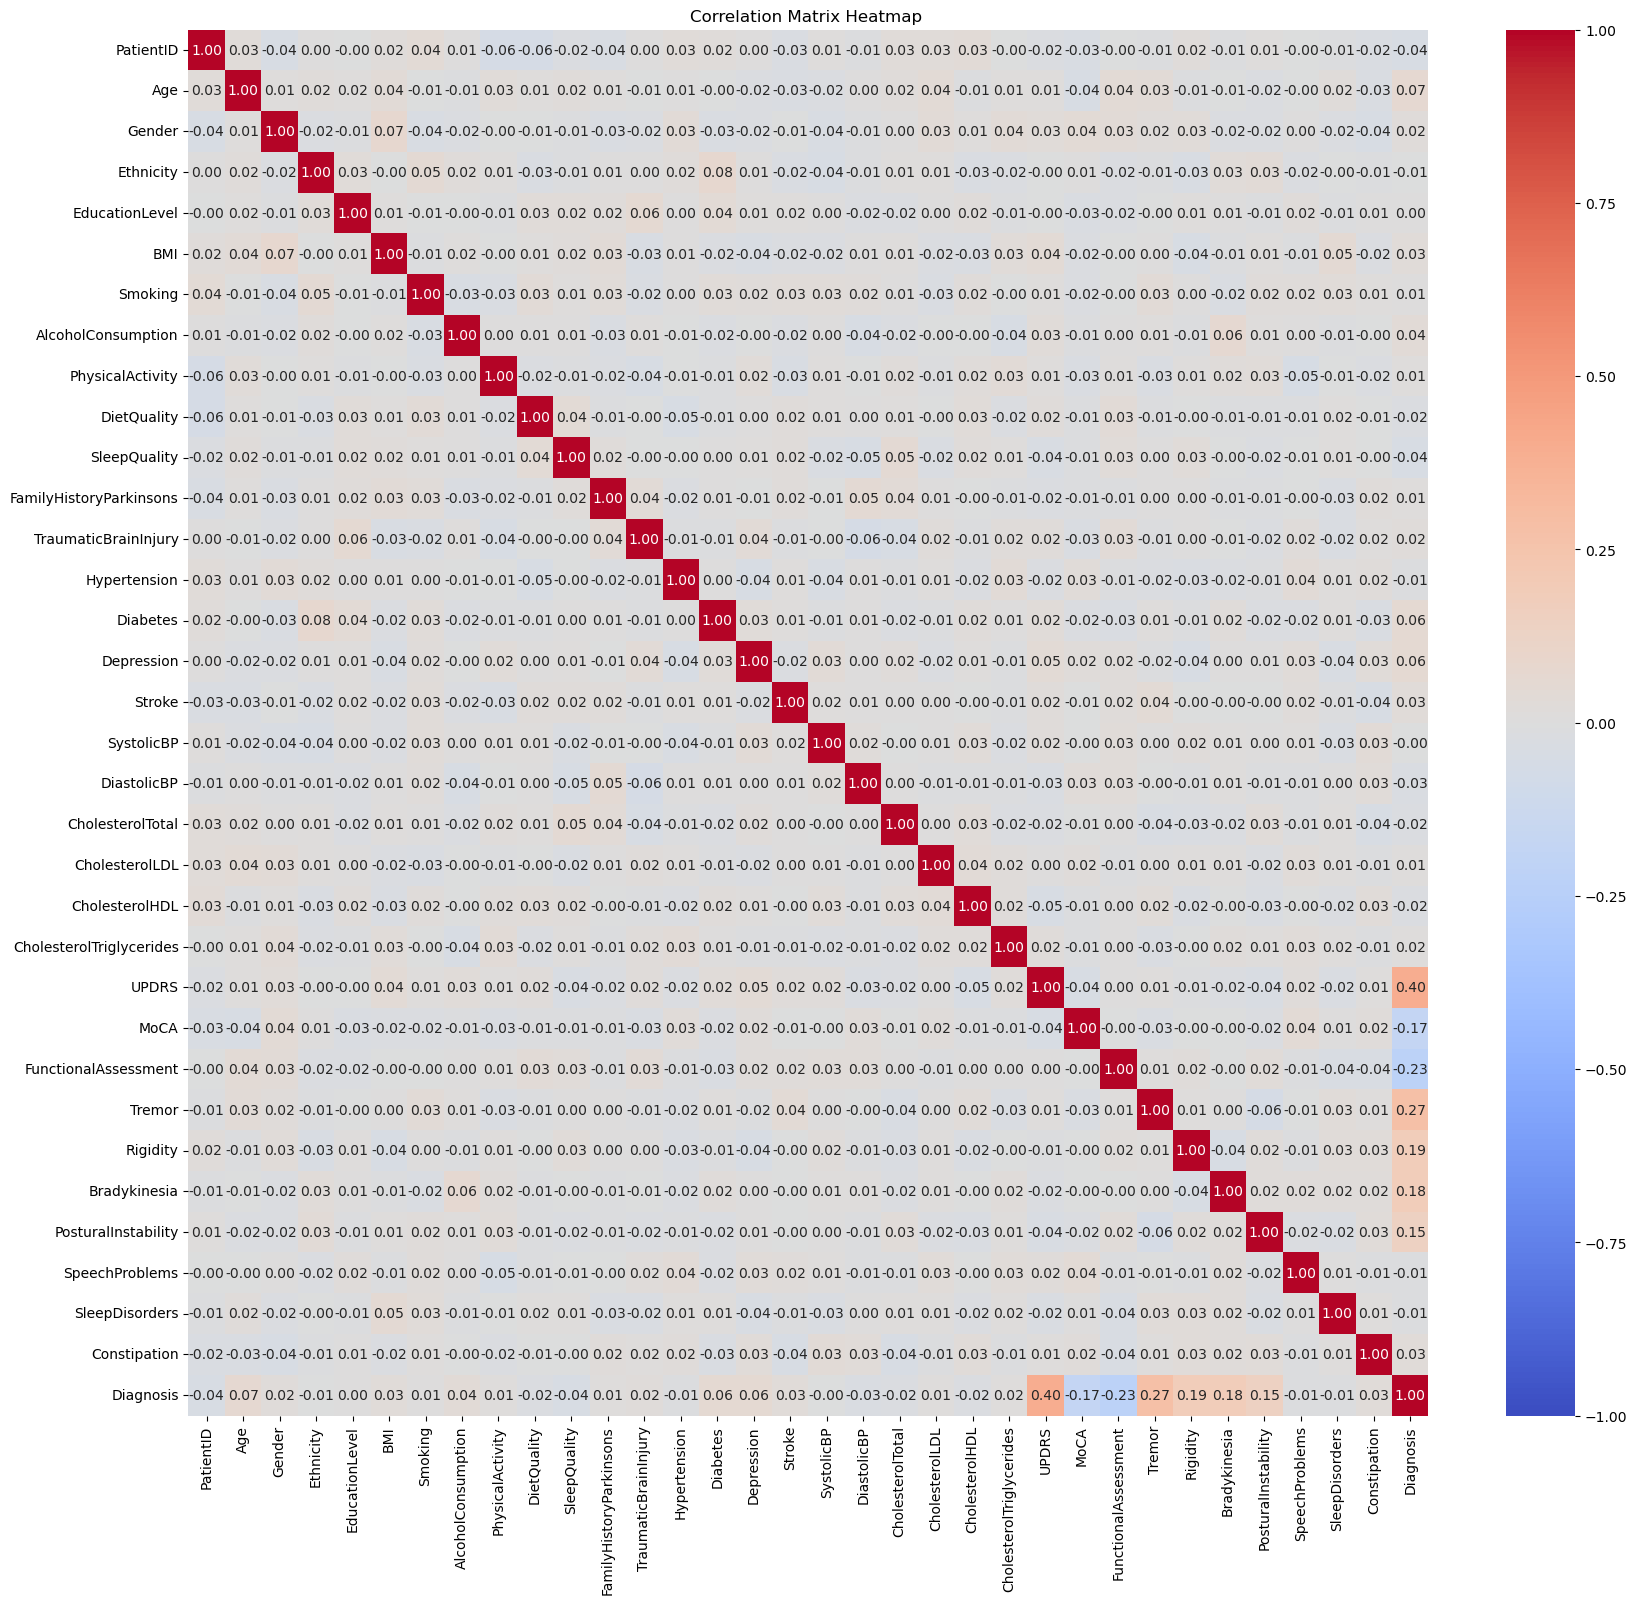

In [20]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix Heatmap ")
plt.show()

This graph shows low correlations between variables, except for those I previously selected.

# Logistic Regression

Logistic regression is a supervised machine learning technique used for **binary classification**. The model predicts the probability that an observation belongs to one of two classes (e.g., 0 or 1).

---

### 1. Logistic Regression Formula

Logistic regression is based on the sigmoid function:

$$
P(y = 1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

$$
z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

The model generates a probability and classifies an observation as:

- **1** if $P(y = 1 \mid X) \geq 0.5$

- **0** otherwise.

---

### 2. Objective

The goal is to optimize the coefficients (\( w_0, w_1, ..., w_n \)) by minimizing a logarithmic loss function (Log-Loss):

$$
\text{Loss} = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- $y_i$: the actual label (0 or 1).
- $\hat{y}_i$: the probability predicted by the model.





In [9]:
features = ['UPDRS', 'Tremor', 'Rigidity', 'Bradykinesia', 
            'PosturalInstability', 'FunctionalAssessment', 'MoCA','Depression','Diabetes','Age']
target = 'Diagnosis'

X = df[features]  
y = df[target]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

coefficients = pd.Series(model.coef_[0], index=features)
print("Coefficients:\n", coefficients)


Accuracy: 0.8004750593824228
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       150
           1       0.84      0.86      0.85       271

    accuracy                           0.80       421
   macro avg       0.78      0.78      0.78       421
weighted avg       0.80      0.80      0.80       421

AUC-ROC: 0.8800246002460026
Coefficients:
 UPDRS                   0.025537
Tremor                  2.206857
Rigidity                1.724645
Bradykinesia            1.556387
PosturalInstability     1.980647
FunctionalAssessment   -0.303938
MoCA                   -0.071746
Depression              0.427489
Diabetes                0.205888
Age                     0.016828
dtype: float64


c:\Users\flavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


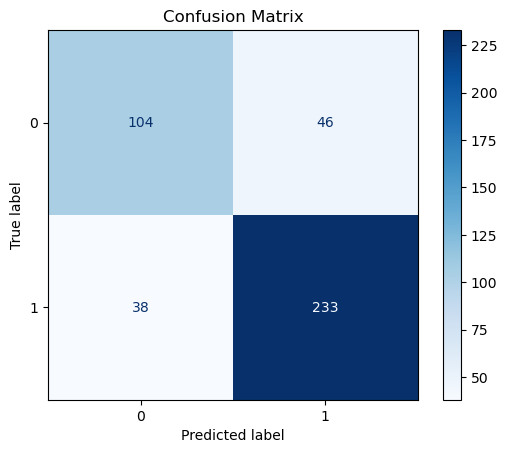

In [10]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Confusion Matrix Interpretation

This confusion matrix evaluates the performance of a binary classification model
---


- **True Negatives (Top-Left: 103)**:
  - The model correctly predicted **0** (negative class) for 103 instances.

- **False Positives (Top-Right: 47)**:
  - The model incorrectly predicted **1** (positive class) for 47 instances that are actually **0**.

- **False Negatives (Bottom-Left: 38)**:
  - The model incorrectly predicted **0** for 38 instances that are actually **1**.

- **True Positives (Bottom-Right: 233)**:
  - The model correctly predicted **1** for 233 instances.

---


1. **Accuracy**:
   The proportion of correctly classified instances:
   $$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Instances}} = \frac{103 + 233}{103 + 47 + 38 + 233} \approx 83.5\%
   $$

2. **Precision** (Positive Predictive Value):
   The proportion of true positive predictions out of all positive predictions:
   $$
   \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{233}{233 + 47} \approx 83.2\%
   $$

3. **Recall** (Sensitivity):
   The proportion of actual positives correctly identified:
   $$
   \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{233}{233 + 38} \approx 86.0\%
   $$

4. **F1-Score**:
   Harmonic mean of Precision and Recall:
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

---

### **Key Observations**
- The model performs well overall, with relatively high **True Positives (233)** and **True Negatives (103)**.
- Some **False Positives (47)** and **False Negatives (38)** are present, indicating areas for improvement.

---

### **Conclusion**
The confusion matrix suggests that the model is performing adequately for binary classification.



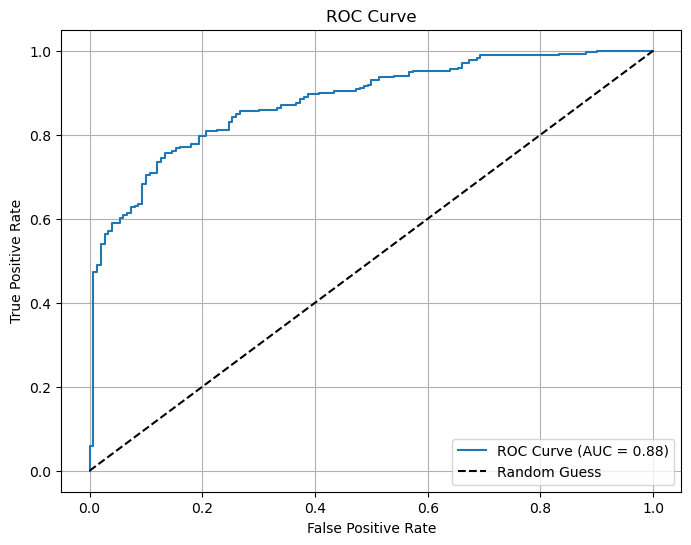

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The displayed graph represents the **ROC Curve (Receiver Operating Characteristic)**, a tool used to evaluate the performance of a binary classifier.

---

### **Graph Components**
1. **Horizontal Axis (False Positive Rate - FPR)**:
   - Represents the percentage of false positives over the total number of negatives.
   - Formula: 
     $$
     FPR = \frac{FP}{FP + TN}
     $$


2. **Vertical Axis (True Positive Rate - TPR)**:
   - Represents the percentage of true positives over the total number of positives.
   - Formula: 
   $$
   TPR = \frac{TP}{TP + FN}
   $$


3. **Blue Line (ROC Curve)**:
   - Shows the trade-off between TPR and FPR at different classification thresholds.
   - In this case, the curve approaches the top-left corner, indicating good performance.

4. **Dashed Line (Random Guess)**:
   - Represents a random classifier (no predictive power).
   - It lies on the diagonal, where \( TPR = FPR \).

5. **AUC (Area Under the Curve)**:
   - Reported as **0.88**.
   - The AUC measures the model's overall ability to distinguish between the two classes:
     - \( AUC = 1.0 \): Perfect classification.
     - \( AUC = 0.5 \): Random classifier.

---

### **Interpretation**
- **Good performance**: With an AUC of **0.88**, the model demonstrates a high ability to distinguish between the two classes.
- **Trade-off**: The graph shows how the model's decisions change with different thresholds:
  - **Closer to the top-left corner**: Better predictive ability.
  - **Closer to the diagonal**: Poorer performance.

---

### **Conclusion**
This graph suggests that the model is effective for the binary classification problem, showing strong discrimination between the classes with a low false positive rate and a high true positive rate.

## Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the data, using a random subset of features at each split. The final prediction is made by aggregating the predictions of all individual trees, typically using majority voting for classification tasks. This technique enhances model robustness and generalization by reducing variance and bias compared to a single decision tree.


# Loading and Preprocessing the Dataset

In [22]:
df = pd.read_csv('parkinsons_disease_data.csv')

df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Defining Support Functions for Training and Evaluation

In [23]:
def train_model(estimator, param_grid, model_name):
    grid_search = GridSearchCV(
        estimator=estimator, 
        param_grid=param_grid, 
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    return grid_search.best_estimator_

def get_metrics(y_test, y_pred, y_prob, model_name):
    metrics = {
        "Model": model_name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "AUC": round(roc_auc_score(y_test, y_prob), 3)
    }
    return metrics

# Model Training and Optimization

In [24]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

best_rf_model = train_model(RandomForestClassifier(random_state=42), param_grid_rf, "Random Forest")

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

best_dt_model = train_model(DecisionTreeClassifier(random_state=42), param_grid_dt, "Decision Tree")

param_grid_pruned_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

best_pruned_dt = train_model(DecisionTreeClassifier(random_state=42), param_grid_pruned_dt, "Decision Tree (Pruned)")

c:\Users\flavi\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best parameters for Decision Tree (Pruned): {'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}


c:\Users\flavi\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Feature Importance RF

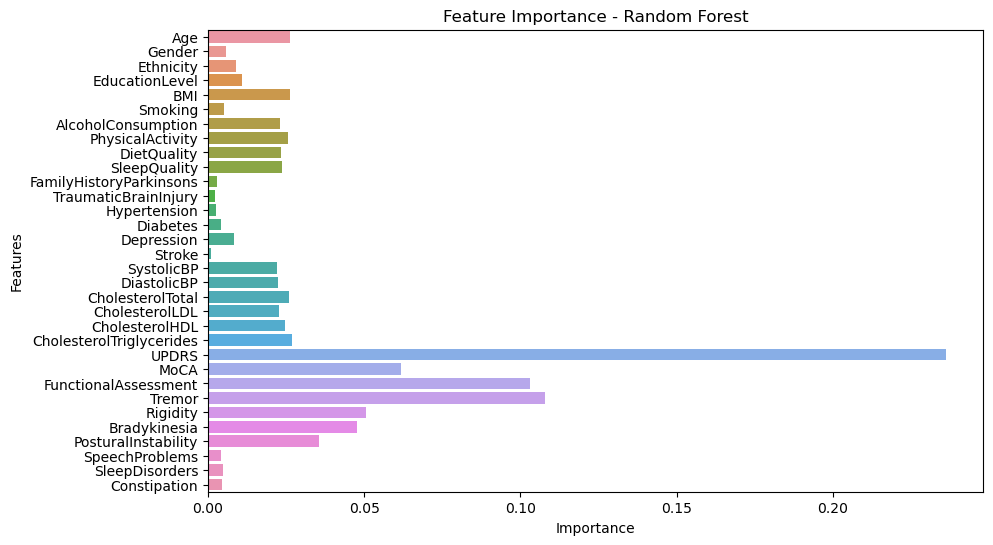

In [25]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Feature Importance DT-Pruned

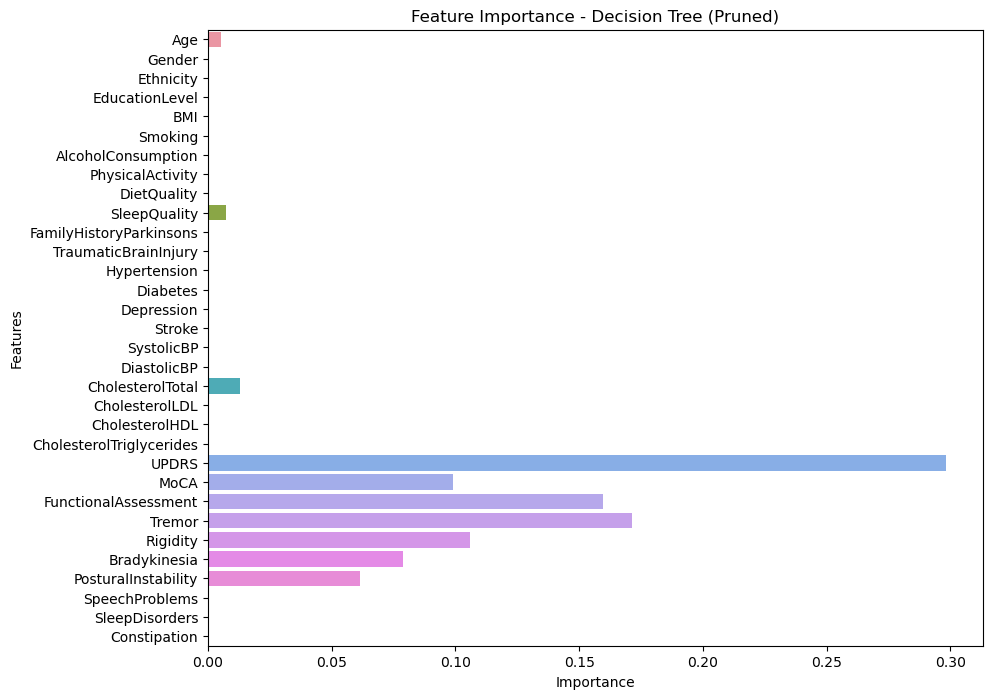

In [26]:
feature_importances_pruned = best_pruned_dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_pruned, y=feature_names)
plt.title("Feature Importance - Decision Tree (Pruned)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Model Evaluation on the Test Set

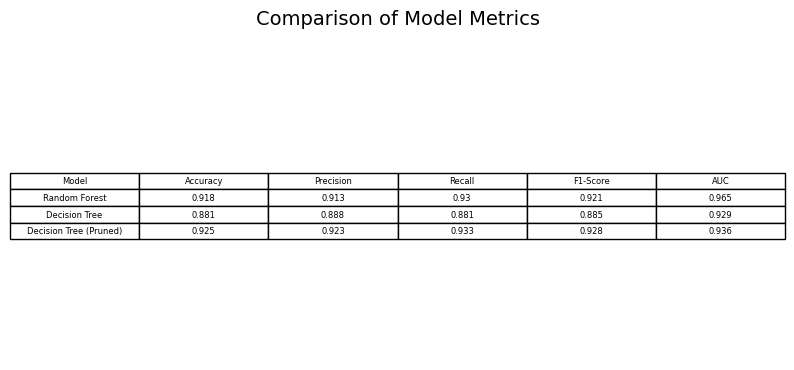

In [ ]:
rf_metrics = get_metrics(y_test, best_rf_model.predict(X_test), best_rf_model.predict_proba(X_test)[:, 1], "Random Forest")
dt_metrics = get_metrics(y_test, best_dt_model.predict(X_test), best_dt_model.predict_proba(X_test)[:, 1], "Decision Tree")
pruned_dt_metrics = get_metrics(y_test, best_pruned_dt.predict(X_test), best_pruned_dt.predict_proba(X_test)[:, 1], "Decision Tree (Pruned)")

results_df = pd.DataFrame([rf_metrics, dt_metrics, pruned_dt_metrics])

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center')
plt.title("Comparison of Model Metrics", fontsize=14, pad=20)
plt.show()

# ROC Curve Visualization

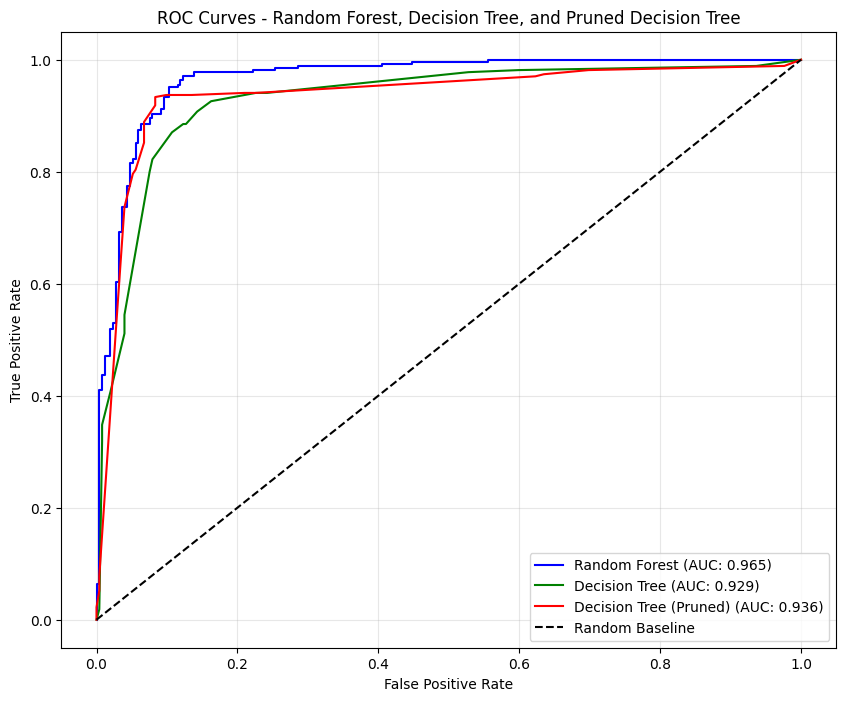

In [ ]:
plt.figure(figsize=(10, 8))

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC: {rf_metrics['AUC']})", color='blue')

fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC: {dt_metrics['AUC']})", color='green')

fpr_pruned, tpr_pruned, _ = roc_curve(y_test, best_pruned_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_pruned, tpr_pruned, label=f"Decision Tree (Pruned) (AUC: {pruned_dt_metrics['AUC']})", color='red')

plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Random Forest, Decision Tree, and Pruned Decision Tree")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Learning Curve Visualization

In [ ]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='accuracy'
)

train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    best_dt_model, X_train, y_train, cv=5, scoring='accuracy'
)

train_sizes_pruned, train_scores_pruned, test_scores_pruned = learning_curve(
    best_pruned_dt, X_train, y_train, cv=5, scoring='accuracy'
)

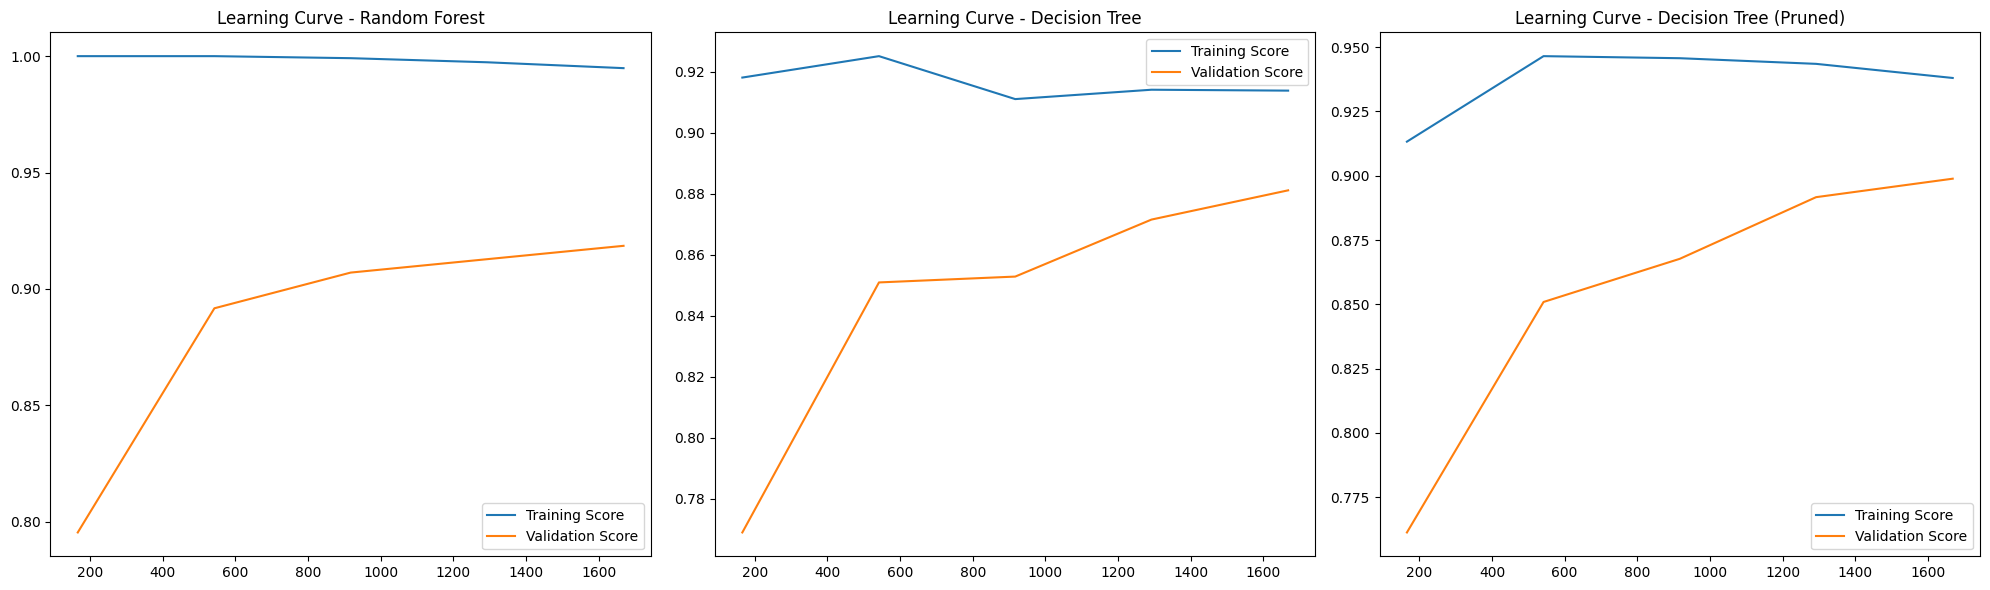

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].plot(train_sizes_rf, train_scores_rf.mean(axis=1), label="Training Score")
axes[0].plot(train_sizes_rf, test_scores_rf.mean(axis=1), label="Validation Score")
axes[0].set_title("Learning Curve - Random Forest")
axes[0].legend()

axes[1].plot(train_sizes_dt, train_scores_dt.mean(axis=1), label="Training Score")
axes[1].plot(train_sizes_dt, test_scores_dt.mean(axis=1), label="Validation Score")
axes[1].set_title("Learning Curve - Decision Tree")
axes[1].legend()

axes[2].plot(train_sizes_pruned, train_scores_pruned.mean(axis=1), label="Training Score")
axes[2].plot(train_sizes_pruned, test_scores_pruned.mean(axis=1), label="Validation Score")
axes[2].set_title("Learning Curve - Decision Tree (Pruned)")
axes[2].legend()

plt.tight_layout()
plt.show()

# Classification Project for Parkinson’s Disease Diagnosis

The objective of this project was to diagnose Parkinson’s disease using machine learning models based on clinical and demographic data from 2,105 patients. The implemented models include Random Forest (RF), Decision Tree (DT), and an optimized version of the Decision Tree with Pre-Pruning. The main goal was to develop accurate, robust, and interpretable models by applying optimization and validation techniques.

Design Choices

The design choices were guided by specific considerations:
	•	Random Forest: Selected for its high performance, robustness, and ability to automatically handle irrelevant features.
	•	Decision Tree: Chosen for its high interpretability, crucial in a clinical context where understanding the decision-making process behind each prediction is essential.
	•	Pre-Pruning: Applied to the Decision Tree to simplify the tree structure without compromising accuracy.

Data Preprocessing

Data preprocessing was essential to ensure prediction quality. Irrelevant columns, “PatientID” and “DoctorInCharge”, were removed as they provided no useful information for diagnosis. Categorical variables such as Gender, Ethnicity, and EducationLevel were encoded using Label Encoding, while numerical features were normalized with StandardScaler.

To address the class imbalance in the dataset, SMOTE was applied, balancing the number of diagnosed and non-diagnosed patients and ensuring that the model was not biased toward the dominant class. Finally, the data was split into 80% for training and 20% for testing.

Random Forest

The Random Forest model was optimized using an exhaustive grid search (GridSearchCV) by tuning key parameters such as:
	•	n_estimators: Number of trees
	•	max_depth: Maximum depth of the trees
	•	min_samples_split: Minimum samples required to split a node
	•	min_samples_leaf: Minimum samples in leaf nodes

During validation with K-Fold Cross Validation, the model achieved an average accuracy of 92%. The learning curve showed a good balance between training and validation scores, indicating no overfitting. Feature importance analysis confirmed that UPDRS and MoCA were the most relevant features for predictions, consistent with clinical literature.

Test set results:
	•	Accuracy: 91.8%
	•	AUC: 0.965

The ROC Curve demonstrated the model’s excellent discriminative ability in distinguishing between positive and negative diagnoses.

Decision Tree

The Decision Tree model was optimized using GridSearchCV, tuning key parameters such as max_depth, min_samples_split, and min_samples_leaf.

Test set results:
	•	Accuracy: 88.1%
	•	AUC: 0.929

Despite its lower performance compared to Random Forest, the Decision Tree still demonstrated competitive results.

Decision Tree with Pre-Pruning

To improve the Decision Tree, Pre-Pruning was applied by limiting:
	•	max_depth: Maximum depth of the tree
	•	max_leaf_nodes: Maximum number of leaf nodes
	•	min_samples_split: Minimum samples required to split a node
	•	min_samples_leaf: Minimum samples required in leaf nodes

This technique significantly reduced the model’s complexity, improved generalization, and maintained high performance.

Test set results:
	•	Accuracy: 92.5%
	•	AUC: 0.936

The simplified model retained its high interpretability, making it ideal for clinical settings where transparency and clarity are crucial.

Comparative Analysis

The three models were compared using key metrics such as accuracy, precision, recall, F1-Score, and AUC. Below is the summary:
	•	Random Forest:
	•	Excellent overall performance with an AUC of 0.965.
	•	Robust and stable, though less interpretable.
	•	Decision Tree:
	•	Lower performance (AUC = 0.929).
	•	Highly interpretable due to its clear tree structure.
	•	Decision Tree with Pre-Pruning:
	•	Best balance between accuracy (92.5%) and interpretability.
	•	Reduced complexity and better control over overfitting.

Conclusions

The Random Forest proved to be the most performant model in terms of accuracy and discriminative ability, achieving an AUC of 0.965 with stable performance in both validation and test sets. However, the Decision Tree with Pre-Pruning offered a more interpretable solution while maintaining a competitive accuracy of 92.5% and strong generalization.

In clinical applications where interpretability is critical, the Decision Tree with Pre-Pruning emerges as the ideal model. At the same time, the Random Forest remains an excellent choice for highly reliable and robust predictions. Both models effectively identified UPDRS and MoCA as key features, confirming their importance in diagnosing Parkinson’s disease.

## Other Random Forest Analysis

In [33]:
# Cross-Validation Configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline with scaling and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Metrics to evaluate
scoring = ['accuracy', 'balanced_accuracy', 'f1', 'roc_auc']

# Run cross-validation
cv_results = {}
for metric in scoring:
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=metric)
    cv_results[metric] = {
        'mean': scores.mean(),
        'std': scores.std()
    }

print("Cross-Validation Results:")
for metric, result in cv_results.items():
    print(f"{metric}: {result['mean']:.4f} ± {result['std']:.4f}")


Cross-Validation Results:
accuracy: 0.9169 ± 0.0117
balanced_accuracy: 0.9074 ± 0.0136
f1: 0.9339 ± 0.0092
roc_auc: 0.9518 ± 0.0092


In [36]:
# Hyperparameter Space
param_dist = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=100,  
    cv=cv,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 30}
Best Score: 0.9244655581947745


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Targeted Grid Search based on previous results
param_grid = {
    'classifier__n_estimators': [150, 200, 250],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [4, 5, 6],
    'classifier__min_samples_leaf': [2, 3],
    'classifier__max_features': [None, 'sqrt']
}

grid_search = GridSearchCV(
    random_search.best_estimator_,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Best Parameters and Score from GridSearchCV
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Best Score from GridSearchCV: {grid_search.best_score_:.2f}")

# 5. Overfitting Check
# Evaluate performance on train and test sets
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("\n=== Training Set Evaluation ===")
print(classification_report(y_train, y_train_pred))
print("\n=== Test Set Evaluation ===")
print(classification_report(y_test, y_test_pred))

# Calculate AUC
train_auc = roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

print(f"\nTrain AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")

# Check for overfitting based on AUC difference
if abs(train_auc - test_auc) > 0.05:
    print("\nWARNING: The model may be overfitting!")
else:
    print("\nThe model appears to generalize well.")


Best Parameters from GridSearchCV: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 200}
Best Score from GridSearchCV: 0.93

=== Training Set Evaluation ===
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       651
           1       0.96      1.00      0.98      1033

    accuracy                           0.97      1684
   macro avg       0.98      0.97      0.97      1684
weighted avg       0.97      0.97      0.97      1684


=== Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.95      0.90      0.92       271

    accuracy                           0.90       421
   macro avg       0.89      0.91      0.90       421
weighted avg       0.91      0.90      0.91       421


Train AUC: 1.00
Test AUC: 0.95

The model a

Cross-Validation Scores: [0.92368265 0.89793757 0.92629134 0.91332219 0.91702763]
Mean CV Score: 0.9157 (+/- 0.0200)

=== Training Set Report ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       651
           1       0.98      0.99      0.98      1033

    accuracy                           0.98      1684
   macro avg       0.98      0.98      0.98      1684
weighted avg       0.98      0.98      0.98      1684


=== Test Set Report ===
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       150
           1       0.95      0.89      0.92       271

    accuracy                           0.90       421
   macro avg       0.89      0.91      0.90       421
weighted avg       0.91      0.90      0.90       421


Confusion Matrix - Training Set:
[[ 625   26]
 [   7 1026]]

Confusion Matrix - Test Set:
[[138  12]
 [ 29 242]]

AUC Train: 0.9989
AUC Test: 0.9530


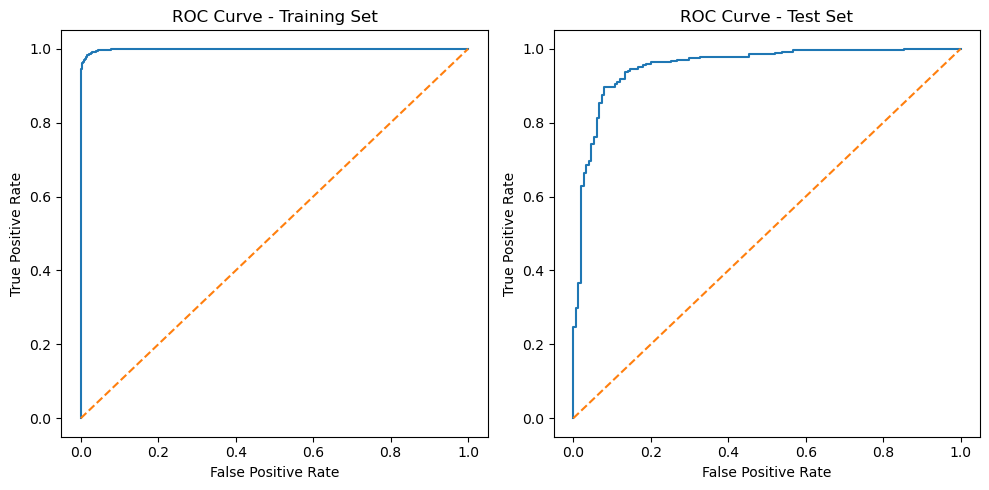


The model appears to generalize well.


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create the pipeline with the new model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=250,
        max_depth=10,
        min_samples_split=4, 
        min_samples_leaf=3,
        max_features='sqrt',
        bootstrap=True,
        class_weight='balanced',
        random_state=42
    ))
])

# 3. Cross-validation evaluation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='balanced_accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# 4. Fit the model and make predictions
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# 5. Classification Reports
print("\n=== Training Set Report ===")
print(classification_report(y_train, y_train_pred))
print("\n=== Test Set Report ===")
print(classification_report(y_test, y_test_pred))

# 6. Confusion Matrix
print("\nConfusion Matrix - Training Set:")
print(confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix - Test Set:")
print(confusion_matrix(y_test, y_test_pred))

# 7. ROC Curves and AUC
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nAUC Train: {train_auc:.4f}")
print(f"AUC Test: {test_auc:.4f}")

# 8. Plot ROC Curves
plt.figure(figsize=(10, 5))

# Training Set ROC Curve
plt.subplot(121)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Test Set ROC Curve
plt.subplot(122)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

# 9. Check for Overfitting
if abs(train_auc - test_auc) > 0.05:
    print("\nWARNING: Potential Overfitting!")
    print(f"Train-Test AUC Difference: {abs(train_auc - test_auc):.4f}")
else:
    print("\nThe model appears to generalize well.")

<h2> Feature Importances Analysis </h2>

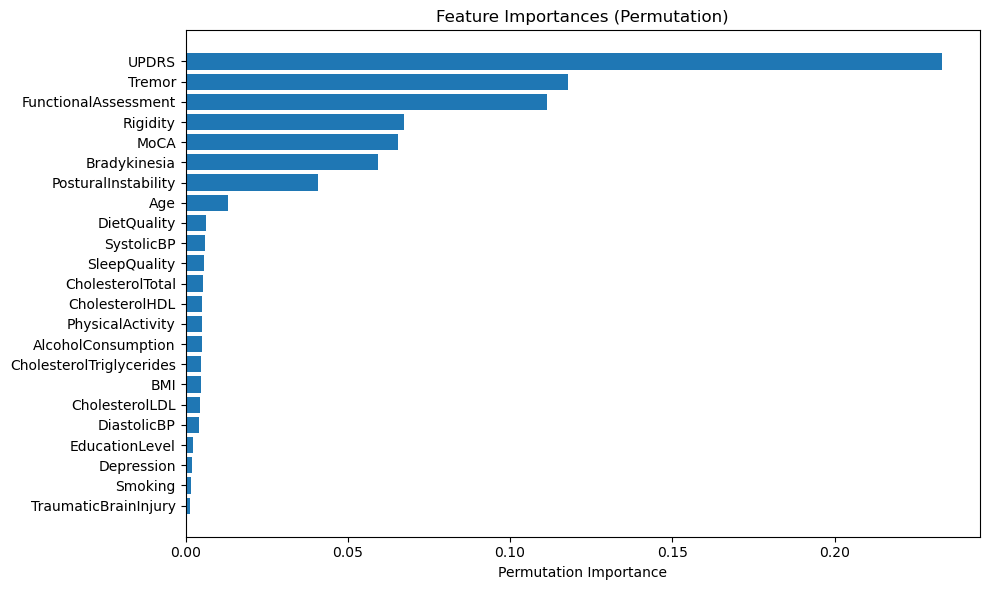


Most significant features (importance > threshold):
Age
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
TraumaticBrainInjury
Depression
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
UPDRS
MoCA
FunctionalAssessment
Tremor
Rigidity
Bradykinesia
PosturalInstability


In [32]:
from sklearn.inspection import permutation_importance

# Model with the best parameters
best_model = random_search.best_estimator_

# Fit the model
best_model.fit(X, y)

# Feature importance using permutation importance
perm_importance = permutation_importance(
    best_model, X, y, 
    n_repeats=10, 
    random_state=42
)

# Define a threshold based on maximum importance
threshold = 0.005  # For example, 1% of the maximum importance
max_importance = np.max(perm_importance.importances_mean)
significant_indices = perm_importance.importances_mean > threshold * max_importance

# Select only the features above the threshold
significant_features = perm_importance.importances_mean[significant_indices]
feature_names = X.columns  # Assume X is a DataFrame
significant_feature_names = [feature_names[i] for i in range(len(feature_names)) if significant_indices[i]]

# Visualization
indices = np.argsort(significant_features)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation)")
plt.barh(range(len(indices)), significant_features[indices])
plt.yticks(range(len(indices)), [significant_feature_names[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

# List of most significant features
print("\nMost significant features (importance > threshold):")
for feature in significant_feature_names:
    print(feature)

<h2> Learning Curve for the Train set </h2>

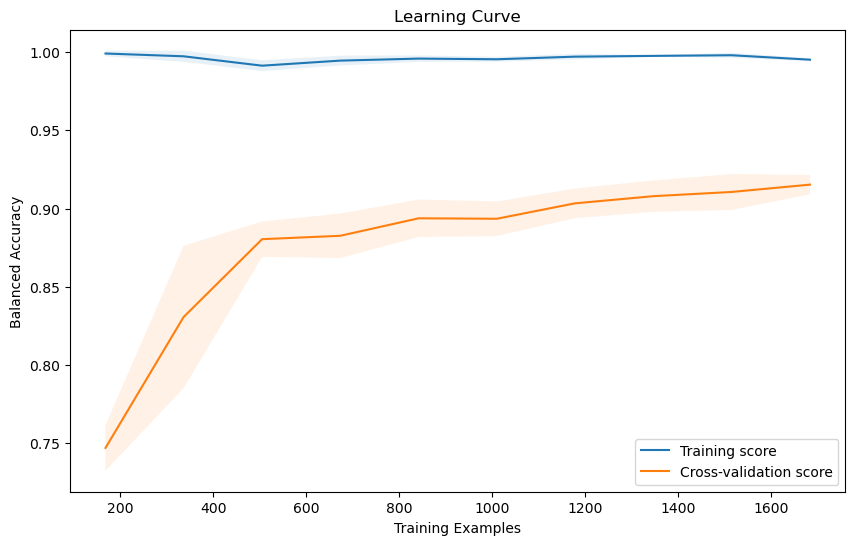

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, 
    X, y, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=cv,
    scoring='balanced_accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Balanced Accuracy')
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.show()

# XG Gradient Boost model

Having some variables with not-bilanced distribution, we want to solve this problem using a combo of tecnics, like for SMOTEENN.

In [ ]:
from imblearn.over_sampling import SMOTE
df_for_sampling = df.copy()
X = df_for_sampling.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X = X.drop('PatientID', axis=1)
y = df_for_sampling['Diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,66,1,0,1,34.824735,0,15.607738,5.525110,5.934543,6.008735,...,142.842782,9.395142,6.864573,0,0,0,0,1,0,0
2604,78,0,0,2,27.195318,0,11.933541,4.217002,5.052205,5.443841,...,63.321793,12.023070,8.792641,0,0,0,0,0,0,1
2605,54,0,1,1,36.603949,0,7.955417,1.912960,6.046110,6.081364,...,36.592368,17.441489,8.421771,0,0,0,0,1,0,1
2606,78,0,0,0,18.862565,0,12.782173,2.840414,5.947246,8.395324,...,21.291950,21.354566,1.693249,0,0,0,0,1,0,0


For the XG Gradient Boost is better to process our variables. The boolean ones doesn't need a preprocessing step, they are already good for our model. About the other features, which are all continuous o discrete but in a specific range, is essenctial to make easier the training of our model apply a normalization to this variables. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

binary_cols = X_resampled.columns[X_resampled.isin([0,1]).all()]
num_cols = [cols for cols in X_resampled.columns if cols not in binary_cols]

X_scaled = X_resampled.copy()
scalers = {}

for col in X_scaled.columns:
    if col in num_cols:
        scalers[col] = MinMaxScaler()
        X_scaled[col] = scalers[col].fit_transform(X_scaled[[col]])

X_scaled

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,0.897436,0,1.000000,0.333333,0.184524,0,0.255471,0.137773,0.389557,0.880549,...,0.032325,0.973661,0.157231,1,0,0,0,0,0,0
1,0.641026,0,0.000000,0.666667,0.049577,1,0.301472,0.841314,0.851695,0.267025,...,0.187398,0.411082,0.479027,0,1,0,1,0,1,0
2,0.512821,1,0.000000,0.000000,0.014401,0,0.112070,0.020930,0.650149,0.988332,...,0.340881,0.998587,0.213106,1,0,0,0,1,0,1
3,0.051282,0,0.000000,0.000000,0.017855,0,0.299978,0.137211,0.671781,0.032619,...,0.266111,0.710646,0.339277,1,1,1,0,0,0,1
4,0.948718,0,0.000000,0.333333,0.144357,0,0.488977,0.118551,0.465949,0.894005,...,0.109471,0.277645,0.320228,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,0.410256,1,0.000000,0.333333,0.792924,0,0.780797,0.552587,0.593699,0.334744,...,0.717930,0.312998,0.686912,0,0,0,0,1,0,0
2604,0.717949,0,0.000000,0.666667,0.487644,0,0.596965,0.421660,0.505429,0.240584,...,0.318177,0.400745,0.879889,0,0,0,0,0,0,1
2605,0.102564,0,0.333333,0.333333,0.864117,0,0.397925,0.191050,0.604861,0.346850,...,0.183807,0.581667,0.842769,0,0,0,0,1,0,1
2606,0.717949,0,0.000000,0.000000,0.154221,0,0.639424,0.283878,0.594970,0.732554,...,0.106892,0.712325,0.169324,0,0,0,0,1,0,0


Division of X and Y in  training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, random_state=42, train_size=0.8, test_size=0.2, stratify=y_resampled )

In [ ]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, train_size=0.8, test_size=0.2, stratify= y_resampled)

Now we are ready to train our XG Boost model. We'll start defining a base for our parameters to see how 'far' are we from the optimal solution. This base parameter are the most common ones for a problem of binary classification, for this reason we'll start from them.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

base_params = {
   'objective': 'binary:logistic',   # Binary classification
    'eval_metric': 'logloss',        # Common metric for binary classification
    'n_estimators': 100,             # Number of trees (boosting iteration)
    'learning_rate': 0.1,           
    'max_depth': 5,                  # Maximum depth for each tree
    'min_child_weight': 1,           
    'subsample': 0.8,                # Campionated rows for each tree
    'colsample_bytree': 0.8,         # Campionated features for each tree
    'random_state': 42               
}

Now we'll use the base parameters as a comparsion to find the best set of hyperparameters.

In [ ]:

param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],     
    'max_depth': [3, 5, 7],                
    'min_child_weight': [1, 3, 5],         
    'subsample': [0.6, 0.8, 1.0],          
    'colsample_bytree': [0.6, 0.8, 1.0],   
    'gamma': [0, 0.1, 0.3]                 
}

grid_search = GridSearchCV(
    estimator = xgb.XGBClassifier(
        **base_params,
        early_stopping_rounds=10
    ),
    param_grid = param_grid,
    cv = StratifiedKFold(n_splits=5),
    scoring = 'f1',
    n_jobs = -1
)

grid_search.fit(X_resampled, y_resampled, eval_set=[(X_test_original, y_test)])
best_xgb = grid_search.best_estimator_

[0]	validation_0-logloss:0.66573
[1]	validation_0-logloss:0.62283
[2]	validation_0-logloss:0.60493
[3]	validation_0-logloss:0.57590
[4]	validation_0-logloss:0.54278
[5]	validation_0-logloss:0.51711
[6]	validation_0-logloss:0.49654
[7]	validation_0-logloss:0.48013
[8]	validation_0-logloss:0.46649
[9]	validation_0-logloss:0.45008
[10]	validation_0-logloss:0.43585
[11]	validation_0-logloss:0.42273
[12]	validation_0-logloss:0.41173
[13]	validation_0-logloss:0.40198
[14]	validation_0-logloss:0.39190
[15]	validation_0-logloss:0.38099
[16]	validation_0-logloss:0.37306
[17]	validation_0-logloss:0.36482
[18]	validation_0-logloss:0.35782
[19]	validation_0-logloss:0.34969
[20]	validation_0-logloss:0.34207
[21]	validation_0-logloss:0.33546
[22]	validation_0-logloss:0.33037
[23]	validation_0-logloss:0.32534
[24]	validation_0-logloss:0.32042
[25]	validation_0-logloss:0.31597
[26]	validation_0-logloss:0.31253
[27]	validation_0-logloss:0.30975
[28]	validation_0-logloss:0.30513
[29]	validation_0-loglos

In [ ]:
print("Best Parameters GridSearchCV:", grid_search.best_params_)
print("Best Score GridSearchCV:", grid_search.best_score_)

Best Parameters GridSearchCV: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 1.0}
Best Score GridSearchCV: 0.9441092347939296


Let's check the performance using the metrics and lookings at the training and the test sets.

In [ ]:
y_test_original_pred = grid_search.predict(X_test_original)
y_train_original_pred = grid_search.predict(X_train_original)

print('Report for Training set')
print(classification_report(y_train, y_train_original_pred))

print('Report for Test set')
print(classification_report(y_test, y_test_original_pred))

print('ROC AUC Score for Training set:', roc_auc_score(y_train, y_train_original_pred))
print('ROC AUC Score for Test set:', roc_auc_score(y_test, y_test_original_pred))


Report for Training set
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1043
           1       0.96      0.98      0.97      1043

    accuracy                           0.97      2086
   macro avg       0.97      0.97      0.97      2086
weighted avg       0.97      0.97      0.97      2086

Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       261
           1       0.96      0.98      0.97       261

    accuracy                           0.97       522
   macro avg       0.97      0.97      0.97       522
weighted avg       0.97      0.97      0.97       522

ROC AUC Score for Training set: 0.9712368168744009
ROC AUC Score for Test set: 0.9674329501915709


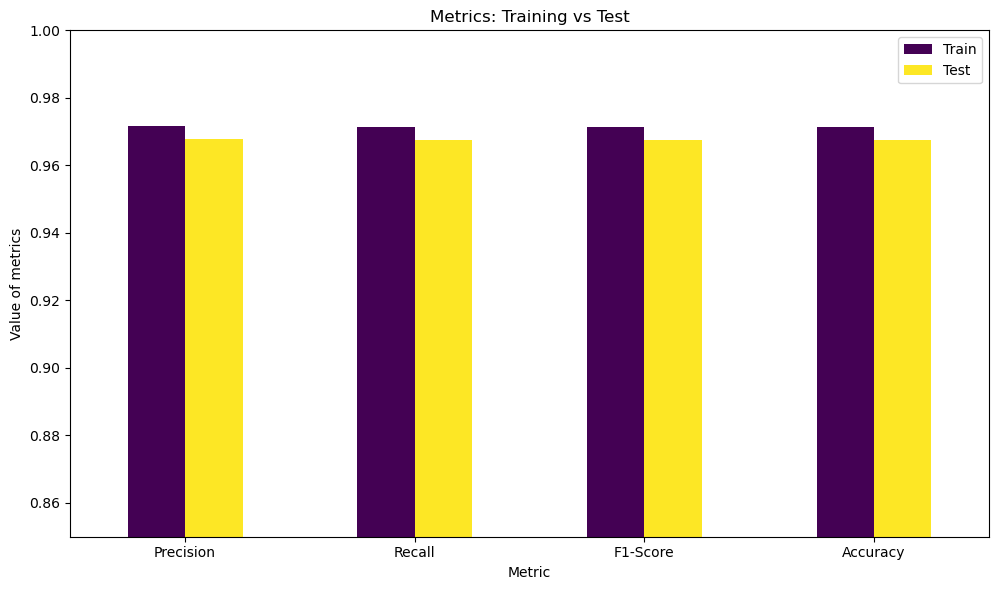

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the main metrics
precision_train = precision_score(y_train, y_train_original_pred, average='weighted')
recall_train = recall_score(y_train, y_train_original_pred, average='weighted')
f1_train = f1_score(y_train, y_train_original_pred, average='weighted')
accuracy_train = accuracy_score(y_train, y_train_original_pred)

precision_test = precision_score(y_test, y_test_original_pred, average='weighted')
recall_test = recall_score(y_test, y_test_original_pred, average='weighted')
f1_test = f1_score(y_test, y_test_original_pred, average='weighted')
accuracy_test = accuracy_score(y_test, y_test_original_pred)

# Organize datas 
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Train': [precision_train, recall_train, f1_train, accuracy_train],
    'Test': [precision_test, recall_test, f1_test, accuracy_test]
}

# Creare a Dataframe
import pandas as pd
metrics_df = pd.DataFrame(metrics_data)


metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Graph
plt.title('Metrics: Training vs Test')
plt.ylabel('Value of metrics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0.85, 1)

plt.show()


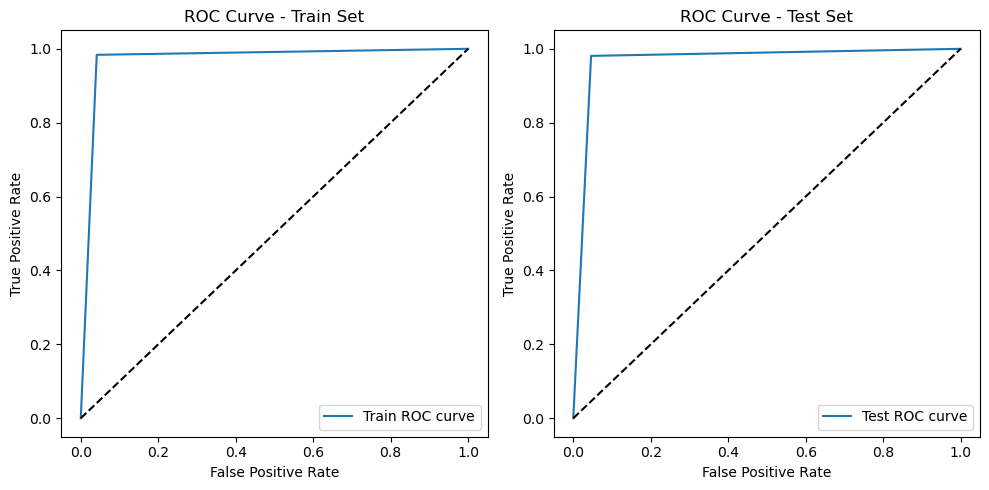

In [ ]:
# Curve ROC e AUC

y_train_prob = grid_search.predict_proba(X_train_original)[:, 1]
y_test_prob = grid_search.predict_proba(X_test_original)[:, 1]


fpr_train, tpr_train, _ = roc_curve(y_train, y_train_original_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_original_pred)

plt.figure(figsize=(10, 5))  

plt.subplot(121)  
plt.title('ROC Curve - Train Set')
plt.plot(fpr_train, tpr_train, label='Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(122)  
plt.title('ROC Curve - Test Set')
plt.plot(fpr_test, tpr_test, label='Test ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()  
plt.show()


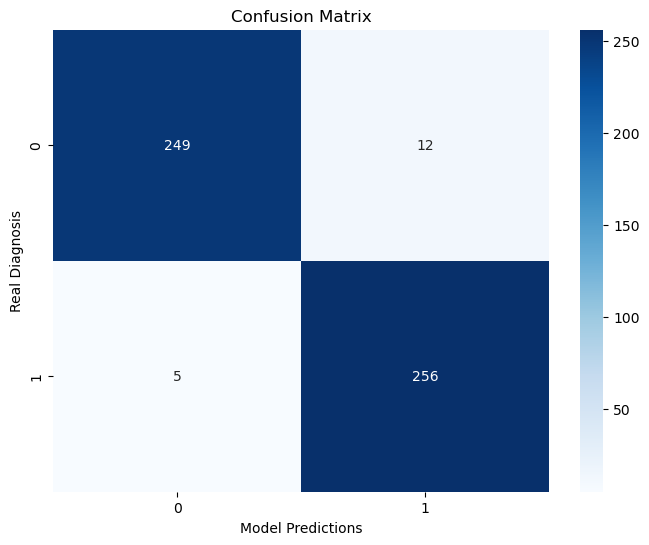

In [ ]:
cm = confusion_matrix(y_test, y_test_original_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Real Diagnosis')
plt.xlabel('Model Predictions')
plt.show()

Let's analyze the Features Importance

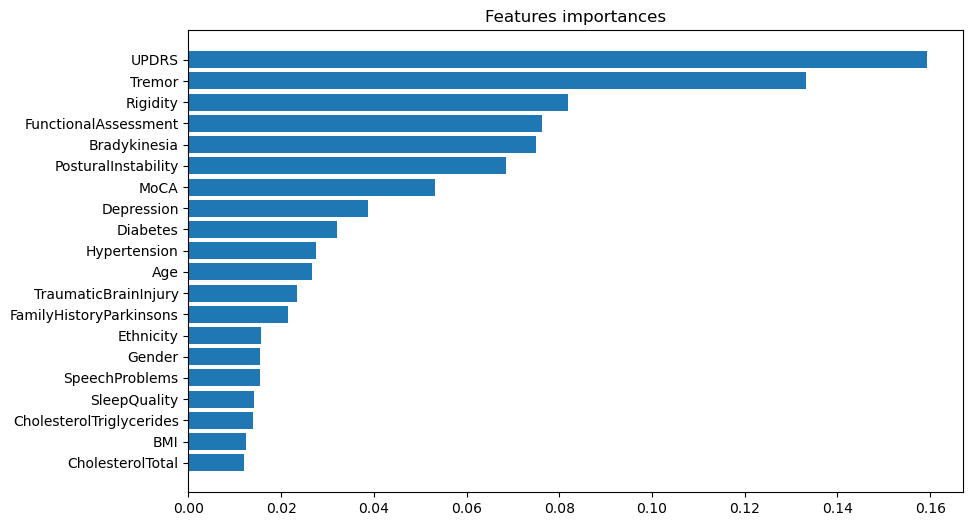

In [ ]:
plt.figure(figsize=(10,6))
sorted_idx = best_xgb.feature_importances_.argsort()[-20:]
plt.barh(range(len(sorted_idx)), best_xgb.feature_importances_[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title('Features importances')
plt.show()

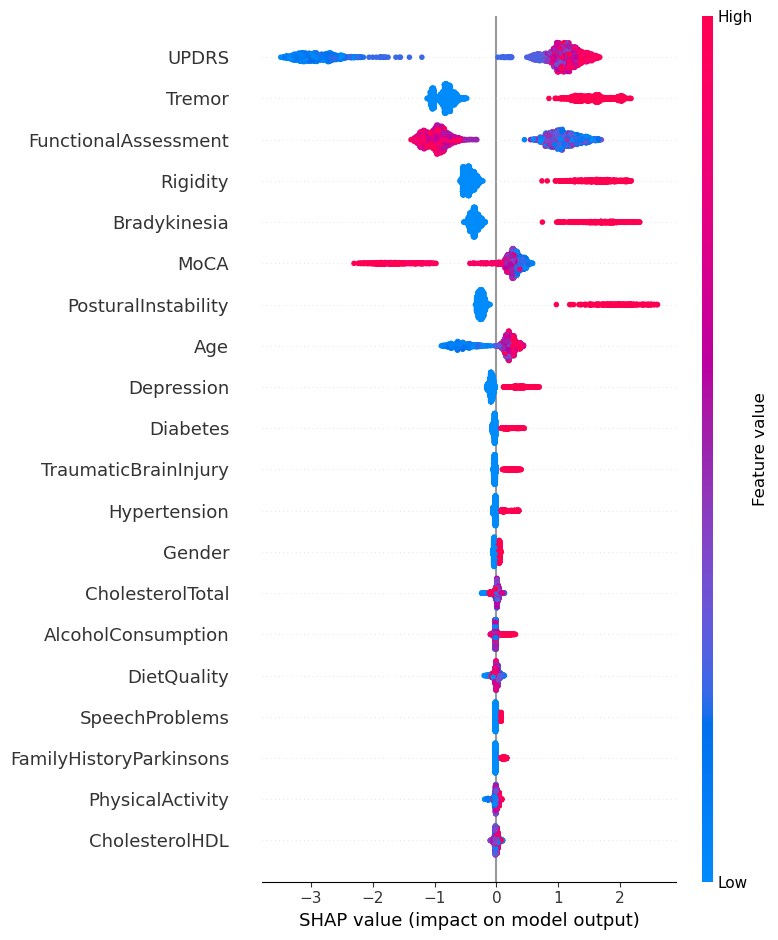

In [ ]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_resampled)
shap.summary_plot(shap_values, X_resampled)

### Counter Factual 

In [ ]:
display(X_test_original.iloc[10]), display(y_test.iloc[10])

Age                          84.000000
Gender                        0.000000
Ethnicity                     0.000000
EducationLevel                1.000000
BMI                          26.520922
Smoking                       1.000000
AlcoholConsumption            9.578330
PhysicalActivity              8.259147
DietQuality                   6.057840
SleepQuality                  6.768564
FamilyHistoryParkinsons       0.000000
TraumaticBrainInjury          0.000000
Hypertension                  0.000000
Diabetes                      0.000000
Depression                    0.000000
Stroke                        0.000000
SystolicBP                   93.000000
DiastolicBP                  81.000000
CholesterolTotal            235.304432
CholesterolLDL               95.640421
CholesterolHDL               91.098874
CholesterolTriglycerides    368.178804
UPDRS                        61.587225
MoCA                         20.143964
FunctionalAssessment          5.365132
Tremor                   

0

(None, None)

In [ ]:
x_test_patient_i = pd.DataFrame(X_test_original.iloc[10].copy()).T
y_pred_patient_1 = grid_search.predict(x_test_patient_i)
print(f'Original predition on the patient: {y_pred_patient_1}')
# our prediction is good as the real diagnosis, check if we change some features when our prediction changes.

x_test_patient_i['Tremor'] #shwow the result, it's 0

x_test_patient_i['Tremor'] = 1 
y_train_patient_1 = grid_search.predict(x_test_patient_i)
print(f'New prediction with Tremor: {y_train_patient_1}')

Original predition on the patient: [0]
New prediction with Tremor: [1]


Here we can see just a very easy and custom idea of the concept about the Counter Factual, we see how our prediction can change if a variable or some of them are changed. In this case we're choosing one of the most importtant symptoms as we have seen in Features importances.

In [ ]:
perc_diagn_with_tremor = 0

for idx, _ in enumerate(X_test_original.T):
    if y_test_pred[idx] == 0:
        x_test_patient_i = pd.DataFrame(X_test_original.iloc[idx].copy()).T
        x_test_patient_i['Tremor'] = 1
        y_test_patient_i = grid_search.predict(x_test_patient_i)
        if y_test_patient_i == 1:
            perc_diagn_with_tremor += 1

print(f'Percentage of healthy patients that if would have Tremor, they would have been classified as sick: {perc_diagn_with_tremor/len(X_test_original)*100}%')

# lets see the opposit case, sick patientes that, without having Rigidity would have been classified as healthy

perc_diagn_without_tremor = 0

for idx, _ in enumerate(X_test_original.T):
    if y_train_pred[idx] == 1:
        x_test_patient_i = pd.DataFrame(X_test_original.iloc[idx].copy()).T
        x_test_patient_i['Tremor'] = 0
        y_test_patient_i = grid_search.predict(x_test_patient_i)
        if y_test_patient_i == 0:
            perc_diagn_without_tremor += 1

print(f'Percentage of sick patients that if would have not Tremor, they would have been classified as healty: {perc_diagn_without_tremor/len(X_test_original)*100}%')

Percentage of healthy patients that if would have Tremor, they would have been classified as sick: 20.114942528735632%
Percentage of sick patients that if would have not Tremor, they would have been classified as healty: 28.544061302681996%


Now we can try with other 'secondary-importace' syntoma, we should expect lower percentages

In [ ]:
perc_diagn_with_rig = 0

for idx, _ in enumerate(X_test_original.T):
    if y_test_pred[idx] == 0:
        x_test_patient_i = pd.DataFrame(X_test_original.iloc[idx].copy()).T
        x_test_patient_i['Rigidity'] = 1
        y_test_patient_i = grid_search.predict(x_test_patient_i)
        if y_test_patient_i == 1:
            perc_diagn_with_rig += 1

print(f'Percentage of healthy patients that if would have Tremor, they would have been classified as sick: {perc_diagn_with_rig/len(X_test_original)*100}%')

# lets see the opposit case, sick patientes that, without having Rigidity would have been classified as healthy

perc_diagn_without_rig = 0

for idx, _ in enumerate(X_test_original.T):
    if y_train_pred[idx] == 1:
        x_test_patient_i = pd.DataFrame(X_test_original.iloc[idx].copy()).T
        x_test_patient_i['Rigidity'] = 0
        y_test_patient_i = grid_search.predict(x_test_patient_i)
        if y_test_patient_i == 0:
            perc_diagn_without_rig += 1

print(f'Percentage of sick patients that if would have not Tremor, they would have been classified as healty: {perc_diagn_without_rig/len(X_test_original)*100}%')

Percentage of healthy patients that if would have Tremor, they would have been classified as sick: 19.54022988505747%
Percentage of sick patients that if would have not Tremor, they would have been classified as healty: 26.436781609195403%


It's intereting beacuse the number of patinets that we predict sick with rigidity is almost the same as the number of patients that have been classified sick with Tremors, but in the opposit case, so eliminateing the precence of the syntomps, in the case of rigidity numbers are way more lower. Probaby both rigidity and trmors are very important syntoms for this disease, so their presence is in an healthy patient can be considered a signal of the presence of the Parkinson, while, if we look at sick patients, just removing one of the most important syntoms will not change for sure our prediction, Sick patients probably show a worse clinical picture.

In order to understand better all the possible combinations and interactions between the syntoms and features, there are several interesting libraries in python to apply the counter factual analysis.

## Counter Factual Analysis

In [ ]:
import shap

shap.initjs() 

# Setup SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_original)

shap.force_plot(explainer.expected_value, shap_values[10], X_test_original.iloc[10])


In [ ]:
import xgboost as xgb
import random

class ConstrainedCounterfactualExplainer:
    def __init__(self, model, feature_constraints):
        """
        Initialize Counterfactual Explainer with Feature Constraints
        
        Args:
        - model: Trained machine learning model
        - feature_constraints: Dictionary with feature constraints

        """
        self.model = model
        self.constraints = feature_constraints
    
    def generate_constrained_counterfactuals(
        self, 
        instance, 
        num_counterfactuals=500, 
        max_attempts=50000
    ):
        """
        Generate counterfactual examples with feature constraints
        
        Args:
        - instance: Original data point
        - target_class: Target class for counterfactual
        - num_counterfactuals: Number of counterfactuals to generate
        - max_attempts: Maximum attempts to generate valid counterfactuals
        
        Returns:
        - List of valid counterfactual examples
        """
        instance = np.asarray(instance).flatten()
        counterfactuals = []
        original_prediction = self.model.predict(instance.reshape(1, -1))

        attempts = 0
        while len(counterfactuals) < num_counterfactuals and attempts < max_attempts:

            # Create a copy of the instance
            counterfactual = instance.copy()

            num_features_to_modify = random.randint(1, len(instance) // 2)
            features_to_modify = random.sample(range(len(instance)), num_features_to_modify)
            
            for feature_idx in features_to_modify:
                # check the type of the feature
                if feature_idx in self.constraints['boolean_features']:
                    counterfactual[feature_idx] = 1 - instance[feature_idx]

                elif feature_idx in self.constraints['categorical_features']:
                    valid_values = self.constraints['valid_categories'][feature_idx]
                    current_value = instance[feature_idx]
                    valid_values = [value for value in valid_values if value != current_value]  
                    if valid_values:  
                        counterfactual[feature_idx] = random.choice(valid_values)

                elif feature_idx in self.constraints['numeric_features']:
                    noise = np.random.normal(0, self.constraints['std_dev'][feature_idx] * 0.1)
                    counterfactual[feature_idx] += noise
                    
                    counterfactual[feature_idx] = np.clip(
                        counterfactual[feature_idx],
                        self.constraints['ranges'][feature_idx][0],
                        self.constraints['ranges'][feature_idx][1]
                    )

                prediction = self.model.predict(counterfactual.reshape(1,-1))
            if prediction != original_prediction:
                counterfactuals.append(counterfactual)
                    
            attempts += 1

        # counterfactuals_df = pd.DataFrame(counterfactuals, columns=list(X_test.columns))
        # for col in list(X_test.columns):
            # if col in scalers.keys():
#                counterfactuals_df[col] = scalers[col].inverse_transform(counterfactuals_df[[col]])

        return counterfactuals

In [ ]:
def counterfactuals_as_original(counterfactuals, features, scalers):
    """
    Convert counterfactuals to original data points
    
    Args:
    - counterfactuals: List of counterfactual examples
    - features: List of feature names
    - scalers: Dictionary with feature scalers
    
    Returns:
    - A DataFrame with counterfactual in the original data points
    """

    counterfactuals_df = pd.DataFrame(counterfactuals, columns=features)
    for col in features:
        if col in scalers.keys():
            counterfactuals_df[col] = scalers[col].inverse_transform(counterfactuals_df[[col]].values)

            if col == 'Age':
                counterfactuals_df[col] = counterfactuals_df[col].round()
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 50, 90)
            elif col == 'Ethnicity' or col == 'EducationLevel':
                counterfactuals_df[col] = counterfactuals_df[col].round()
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 0, 3)
            elif col == 'BMI':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 15, 40)
            elif col == 'AlcoholConsumption':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col],0,20)
            elif col == 'PhysicalActivity' or col == 'DietQuality':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 0, 10)
            elif col == 'SleepQuality':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 4, 10)
            elif col == 'SystolicBP':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 90, 180)
            elif col == 'DiastolicBP':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 60, 120)
            elif col == 'CholesterolTotal':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 150, 300)
            elif col == 'CholesterolLDL':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 50, 200)
            elif col == 'CholesterolHDL':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 20, 100)
            elif col == 'CholesterolTriglycerides':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 50, 400)
            elif col == 'UPDRS':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 0, 199)
            elif col == 'MoCA':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 0, 30)
            elif col == 'FunctionalAssessment':
                counterfactuals_df[col] = np.clip(counterfactuals_df[col], 0, 10)
                        
    return counterfactuals_df

In [ ]:
feature_constraints = {
    'boolean_features': [],  
    'categorical_features': [],  
    'numeric_features': [],  
    'std_dev': {},  
    'valid_categories': {},  
    'ranges': {}  
}


std_dev_array = X_resampled.std(axis=0).to_numpy()
for idx, col in enumerate(X_resampled.columns):
    unique_val = X_resampled[col].unique()
    if set(unique_val) == {0, 1}:  
        feature_constraints['boolean_features'].append(idx)
    elif len(unique_val) <= 10:  
        feature_constraints['categorical_features'].append(idx)
        feature_constraints['valid_categories'][idx] = list(unique_val)
    else:  
        feature_constraints['numeric_features'].append(idx)
        feature_constraints['ranges'][idx] = (X_resampled[col].min(), X_resampled[col].max())
    
    feature_constraints['std_dev'][idx] = std_dev_array[idx]

In [ ]:
explainer = ConstrainedCounterfactualExplainer(best_xgb, feature_constraints)
features = list(X_test.columns)
instance = X_test_original.iloc[10]  
# Generate Counterfactuals
counterfactuals = explainer.generate_constrained_counterfactuals(
    instance=instance, 
)

print("Original instance")
display(instance)

counterfactuals_df = pd.DataFrame(counterfactuals, columns = features)
counterfactuals_df


Original instance


Age                          84.000000
Gender                        0.000000
Ethnicity                     0.000000
EducationLevel                1.000000
BMI                          26.520922
Smoking                       1.000000
AlcoholConsumption            9.578330
PhysicalActivity              8.259147
DietQuality                   6.057840
SleepQuality                  6.768564
FamilyHistoryParkinsons       0.000000
TraumaticBrainInjury          0.000000
Hypertension                  0.000000
Diabetes                      0.000000
Depression                    0.000000
Stroke                        0.000000
SystolicBP                   93.000000
DiastolicBP                  81.000000
CholesterolTotal            235.304432
CholesterolLDL               95.640421
CholesterolHDL               91.098874
CholesterolTriglycerides    368.178804
UPDRS                        61.587225
MoCA                         20.143964
FunctionalAssessment          5.365132
Tremor                   

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,84.609939,1.0,0.0,1.0,26.340652,0.0,9.578330,8.259147,6.057840,6.768564,...,67.488676,19.805079,4.924588,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,84.000000,0.0,0.0,1.0,27.616882,1.0,9.578330,8.476924,6.057840,6.768564,...,61.587225,20.143964,5.365132,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,84.000000,0.0,2.0,1.0,26.520922,1.0,9.578330,8.259147,6.057840,6.768564,...,61.587225,20.143964,5.365132,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,84.000000,1.0,3.0,3.0,26.520922,0.0,9.865207,8.259147,5.663945,6.813659,...,61.587225,20.143964,5.536067,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,83.126318,0.0,3.0,2.0,26.520922,1.0,9.578330,8.259147,6.057840,6.517256,...,63.544291,20.376264,5.365132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,84.000000,0.0,0.0,3.0,27.167676,0.0,9.578330,8.140630,5.760899,6.943970,...,61.587225,21.743490,5.374167,1.0,0.0,0.0,1.0,0.0,1.0,1.0
496,84.344739,0.0,0.0,3.0,26.520922,1.0,8.523619,8.259147,5.896989,6.768564,...,61.587225,20.143964,5.365132,1.0,0.0,0.0,0.0,1.0,1.0,0.0
497,84.000000,0.0,2.0,1.0,26.520922,0.0,9.578330,8.259147,6.057840,6.768564,...,61.587225,20.143964,5.365132,1.0,0.0,0.0,0.0,0.0,1.0,0.0
498,82.601027,0.0,0.0,1.0,28.579791,1.0,9.578330,8.259147,5.889510,6.898441,...,53.513024,20.575805,5.365132,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Now we can compute which variables most of the times, when is changed, can cause a different prediction.

In [ ]:
variations = counterfactuals_df.sub(instance, axis=1).abs()
feature_modification_count = (variations > 0).sum().sort_values(ascending=False)
print("How many times a feature has been changed:")
print(feature_modification_count[:10])

How many times a feature has been changed:
PosturalInstability     206
Bradykinesia            201
Tremor                  193
Rigidity                179
CholesterolLDL          170
UPDRS                   166
CholesterolTotal        164
Smoking                 162
FunctionalAssessment    162
SleepQuality            161
dtype: int64


Now we'have tried with a good amount of counterfactuals just on one patient, we need to expand it on all the patient of the test_set, sick and healthy.

In [ ]:
from tqdm.auto import tqdm

X_test_counterfactuals_sick = X_test_original[y_test_pred == 1].reset_index(drop=True)
X_test_counterfactuals_healthy = X_test_original[y_test_pred == 0].reset_index(drop=True)


def counterfactuals_for_group(group, explainer, verbose:bool=True):
    feature_variations = np.zeros(group.shape[1], dtype=int)
    all_counterfactuals = []
    iterator = tqdm(group.iterrows(), total=len(group), disable=not verbose)

    for idx, instance in iterator:
        try:
            counterfactuals = explainer.generate_constrained_counterfactuals(
                instance=instance,
                num_counterfactuals=100,
                max_attempts=500
            )
            if len(counterfactuals) == 0:
                print(f"No counterfactuals generated for instance {idx+1}")
                continue
            all_counterfactuals.append(counterfactuals)
            counterfactuals_array = np.array(counterfactuals)
            variations = np.abs(counterfactuals_array - instance.values)
            feature_modification_count = (variations > 0 ).sum(axis=0)
            feature_variations += feature_modification_count
        except Exception as e:
            print(f"Error processing instance {idx+1}: {e}")
    
    return pd.Series(feature_variations, index = group.columns), all_counterfactuals

In [ ]:
explainer = ConstrainedCounterfactualExplainer(best_xgb, feature_constraints)
variations_sick_df, all_counterfactuals_sick = counterfactuals_for_group(X_test_counterfactuals_sick, explainer)
variations_sick_df = variations_sick_df.sort_values(ascending=False)
variations_sick_df

  0%|          | 0/268 [00:00<?, ?it/s]

No counterfactuals generated for instance 2
No counterfactuals generated for instance 3
No counterfactuals generated for instance 7
No counterfactuals generated for instance 11
No counterfactuals generated for instance 13
No counterfactuals generated for instance 15
No counterfactuals generated for instance 16
No counterfactuals generated for instance 17
No counterfactuals generated for instance 19
No counterfactuals generated for instance 20
No counterfactuals generated for instance 21
No counterfactuals generated for instance 23
No counterfactuals generated for instance 24
No counterfactuals generated for instance 29
No counterfactuals generated for instance 32
No counterfactuals generated for instance 35
No counterfactuals generated for instance 37
No counterfactuals generated for instance 43
No counterfactuals generated for instance 46
No counterfactuals generated for instance 47
No counterfactuals generated for instance 56
No counterfactuals generated for instance 58
No counterfac

Tremor                      3288
Rigidity                    2232
UPDRS                       1999
EducationLevel              1925
CholesterolLDL              1915
MoCA                        1900
AlcoholConsumption          1899
Stroke                      1895
CholesterolTriglycerides    1894
Gender                      1876
Age                         1872
CholesterolHDL              1871
CholesterolTotal            1866
SleepDisorders              1862
Constipation                1858
SpeechProblems              1854
FunctionalAssessment        1848
Ethnicity                   1845
Depression                  1843
Hypertension                1842
Smoking                     1837
BMI                         1837
Bradykinesia                1833
DietQuality                 1831
SleepQuality                1826
Diabetes                    1821
TraumaticBrainInjury        1797
SystolicBP                  1792
FamilyHistoryParkinsons     1791
PhysicalActivity            1788
DiastolicB

In [ ]:
explainer = ConstrainedCounterfactualExplainer(best_xgb, feature_constraints)
variations_healty_df, all_counterfactuals_healty = counterfactuals_for_group(X_test_counterfactuals_healthy, explainer)
variations_healty_df = variations_healty_df.sort_values(ascending=False)
variations_healty_df

  0%|          | 0/254 [00:00<?, ?it/s]

No counterfactuals generated for instance 34


PosturalInstability         11420
Bradykinesia                10669
Rigidity                    10226
Tremor                       9891
UPDRS                        7489
FamilyHistoryParkinsons      7438
Depression                   7387
Diabetes                     7371
TraumaticBrainInjury         7345
Hypertension                 7266
Constipation                 7253
Stroke                       7246
PhysicalActivity             7229
SpeechProblems               7218
Gender                       7215
Ethnicity                    7191
BMI                          7168
Smoking                      7154
FunctionalAssessment         7149
DietQuality                  7119
MoCA                         7115
SleepQuality                 7083
EducationLevel               7062
AlcoholConsumption           7055
SystolicBP                   7028
CholesterolTriglycerides     7022
CholesterolTotal             7022
CholesterolLDL               6995
Age                          6994
CholesterolHDL

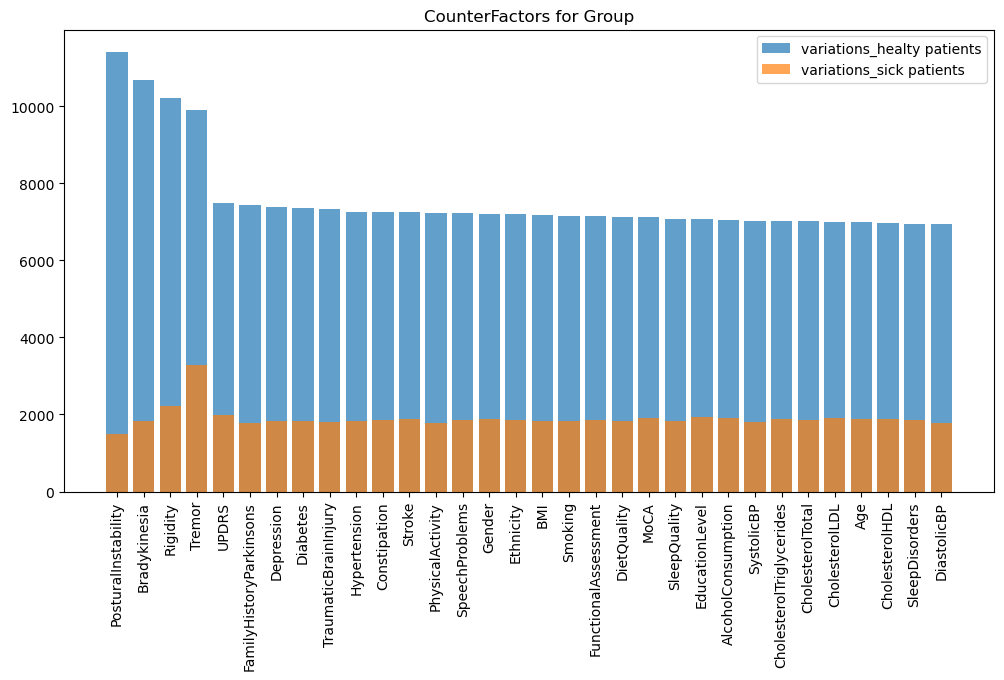

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(variations_healty_df.index, variations_healty_df, alpha=0.7, label = 'variations_healty patients')
plt.bar(variations_sick_df.index, variations_sick_df, alpha=0.7, label = 'variations_sick patients')
plt.xticks(rotation=90)
plt.legend()
plt.title("CounterFactors for Group")
plt.show()

Now lets try to see how the features are changing in order to have a different prediction 

In [ ]:
flattened_counterfactuals_healty = [cf for instance_cf in all_counterfactuals_healty for cf in instance_cf]

counterfactuals_healty_df = pd.DataFrame(flattened_counterfactuals_healty, columns=X_test_original.columns)
counterfactuals_healty_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,57.000000,0.0,2.0,1.0,24.255781,0.0,19.584955,8.222431,6.590513,7.371562,...,45.150659,20.446424,2.041837,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,57.000000,0.0,3.0,0.0,22.364056,1.0,19.584955,8.222431,6.590513,7.578010,...,41.529517,20.246512,2.089252,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,57.244354,0.0,2.0,2.0,24.965776,0.0,19.584955,8.222431,6.579444,7.702826,...,51.789022,20.054183,1.931589,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,57.000000,0.0,2.0,1.0,23.472568,0.0,19.584955,8.222431,6.195087,7.702826,...,45.150659,19.670930,2.113517,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,1.0,2.0,0.0,23.472568,0.0,19.584955,9.001028,6.488229,7.702826,...,44.077804,20.446424,2.113517,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21974,67.000000,1.0,0.0,3.0,31.752279,0.0,6.181516,7.991632,7.159007,9.060515,...,4.069157,22.039914,6.374856,1.0,1.0,1.0,1.0,0.0,1.0,0.0
21975,68.130808,0.0,0.0,1.0,31.642693,0.0,6.274071,7.290639,7.159007,9.060515,...,4.069157,24.067770,6.374856,1.0,1.0,0.0,1.0,0.0,1.0,0.0
21976,67.244061,1.0,0.0,1.0,32.552993,0.0,5.581648,7.211200,7.159007,9.060515,...,4.069157,24.461723,6.374856,1.0,0.0,1.0,1.0,1.0,0.0,0.0
21977,67.000000,1.0,0.0,1.0,31.752279,1.0,5.581648,7.691086,7.159007,9.060515,...,4.069157,24.067770,6.374856,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
flattened_counterfactuals_sick = [cf for instance_cf in all_counterfactuals_sick for cf in instance_cf]

counterfactuals_sick_df = pd.DataFrame(flattened_counterfactuals_sick, columns=X_test_original.columns)
counterfactuals_sick_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,81.508298,1.0,0.0,2.0,29.174191,0.0,2.840230,8.245647,8.592444,7.003006,...,67.855198,1.074653,5.017209,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,82.000000,0.0,0.0,2.0,29.169129,1.0,2.840230,8.245647,8.592444,7.047053,...,49.181802,1.074653,4.805436,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82.000000,0.0,0.0,2.0,29.174191,0.0,2.840230,8.245647,8.592444,6.992007,...,67.855198,1.074653,5.229950,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,82.000000,1.0,0.0,2.0,29.174191,0.0,2.840230,8.245647,8.592444,7.224127,...,67.855198,1.074653,5.093817,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.000000,1.0,0.0,3.0,29.615402,1.0,3.016521,8.245647,8.592444,7.224127,...,67.855198,0.788155,5.127541,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,65.000000,0.0,0.0,2.0,21.760245,1.0,4.524605,1.893565,2.948921,7.934821,...,162.467249,23.088035,6.817039,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6409,65.707516,1.0,0.0,0.0,21.760245,1.0,4.524605,1.893565,3.579710,7.934821,...,162.467249,23.088035,7.014319,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6410,65.000000,0.0,0.0,0.0,21.760245,0.0,4.524605,1.893565,3.579710,7.934821,...,162.467249,23.088035,7.216819,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6411,65.000000,0.0,0.0,0.0,21.760245,1.0,4.524605,1.893565,3.579710,7.934821,...,162.467249,23.088035,7.014319,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification tasks. It works by finding the optimal hyperplane that separates data points of different classes with the maximum margin. SVM aims to maximize the margin between the closest data points (support vectors) from each class to improve generalization.

## Radial Basis Function (RBF) Kernel

The Radial Basis Function (RBF) kernel is commonly used in Support Vector Machines (SVM) to handle non-linear classification tasks. It maps the input data into a higher-dimensional space, where a linear decision boundary can be found.


In [39]:
df = pd.read_csv('parkinsons_disease_data.csv')

In [40]:
X = df.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X=X.drop("PatientID", axis=1)
y = df['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Division into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

Define support vector machine model

In [41]:
from sklearn import svm
model = svm.SVC(kernel='rbf',probability=True,C=10,gamma=0.01)
model.fit(X_train,y_train)

SVC(C=10, gamma=0.01, probability=True)

Calculate Metrics


Model Performance Metrics:
--------------------------
Accuracy       : 0.84
Precision      : 0.87
Recall         : 0.88
F1-Score       : 0.87
AUC-ROC Score  : 0.83



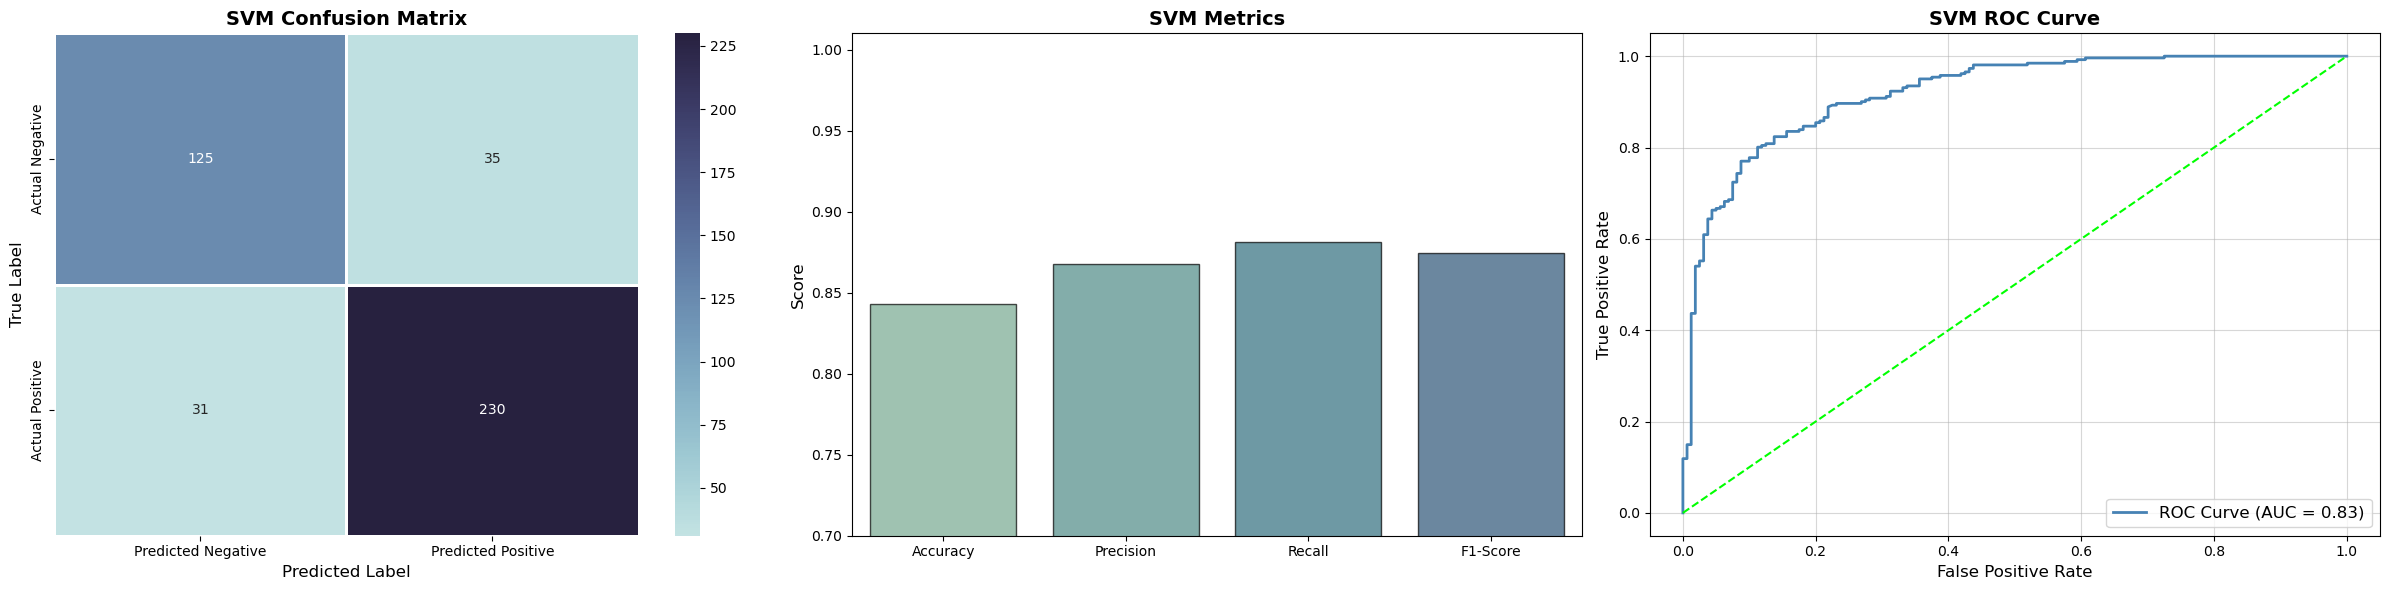

In [45]:
y_pred= model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]  # Probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Print model performance metrics
print(f"""
Model Performance Metrics:
--------------------------
Accuracy       : {accuracy:.2f}
Precision      : {precision:.2f}
Recall         : {recall:.2f}
F1-Score       : {f1:.2f}
AUC-ROC Score  : {auc_roc:.2f}
""")

# Create figure layout
plt.figure(figsize=(24, 6))

# Subplot 1: Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.title("SVM Confusion Matrix", fontsize=14, weight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Subplot 2: Barplot of metrics
plt.subplot(1, 3, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]
sns.barplot(x=metrics, y=scores, palette="crest", edgecolor="black", alpha=0.7)
plt.title("SVM Metrics", fontsize=14, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.ylim(0.7, 1.01)  

# Subplot 3: ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color="steelblue", lw=2, label=f"ROC Curve (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], color="lime", linestyle="--")  
plt.title("SVM ROC Curve", fontsize=14, weight="bold")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


Let's use `Bootstrap` to improve the performances of model

In [47]:
from sklearn.utils import resample

# Apply Bootstrap with 5000 samples
df_bootstrap = resample(df, replace=True, n_samples=5000, random_state=42)

X = df_bootstrap.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X= X.drop("PatientID", axis=1)
y = df_bootstrap['Diagnosis']

# Division into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
from sklearn import svm
model = svm.SVC(kernel='rbf',probability=True,C=10,gamma=0.01)
model.fit(X_train,y_train)

SVC(C=10, gamma=0.01, probability=True)


Model Performance Metrics:
--------------------------
Accuracy       : 0.93
Precision      : 0.90
Recall         : 1.00
F1-Score       : 0.95
AUC-ROC Score  : 0.90



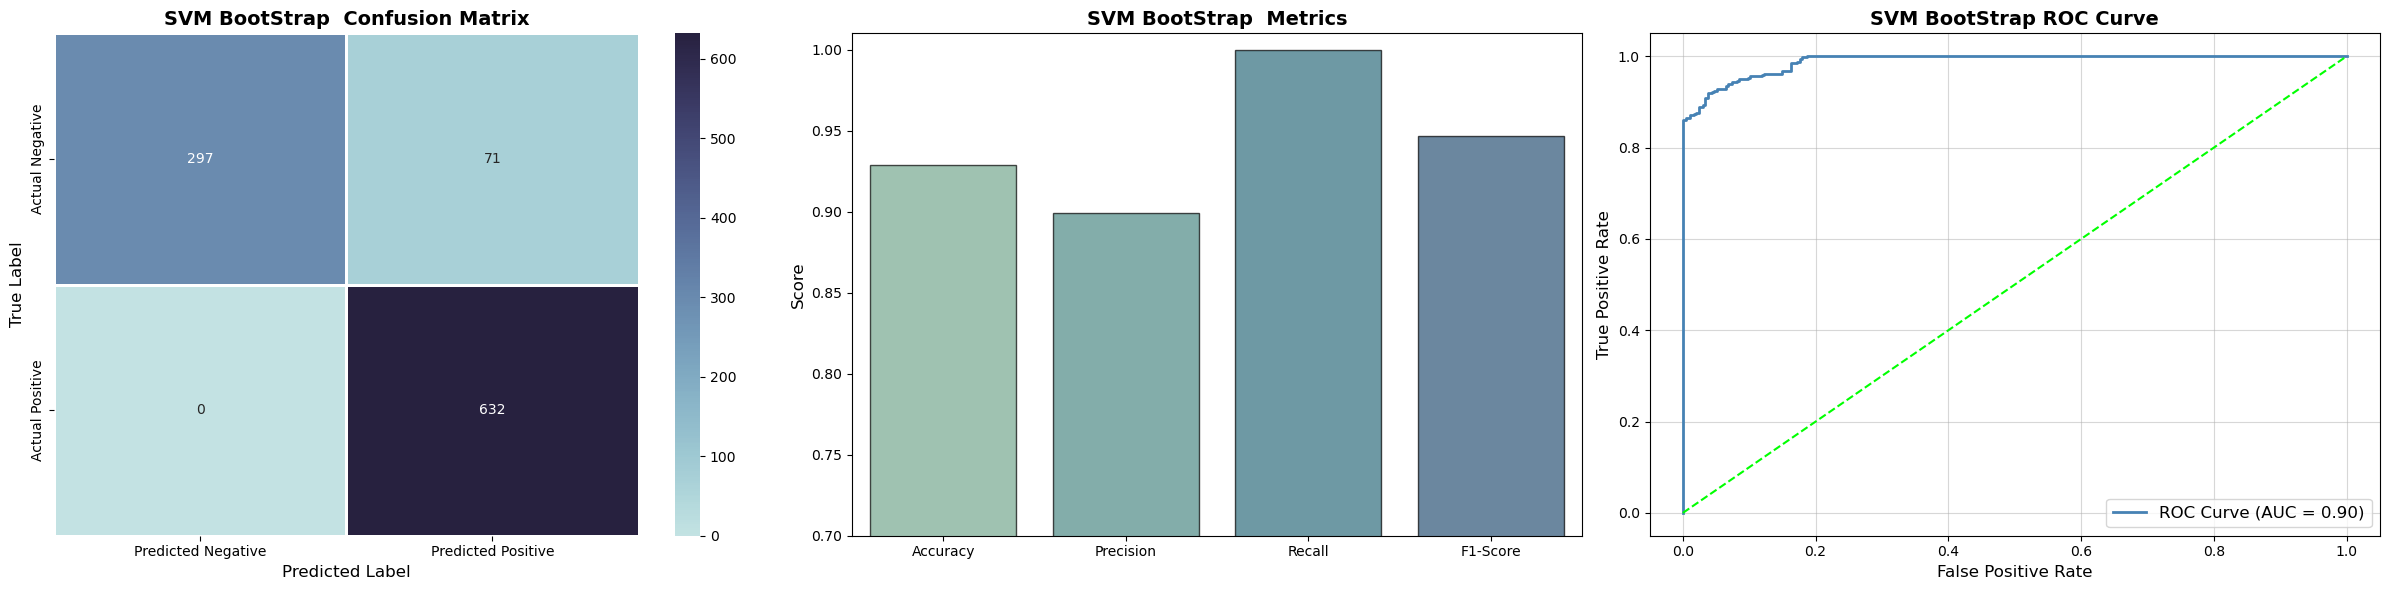

In [50]:
y_pred= model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]  # Probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Print model performance metrics
print(f"""
Model Performance Metrics:
--------------------------
Accuracy       : {accuracy:.2f}
Precision      : {precision:.2f}
Recall         : {recall:.2f}
F1-Score       : {f1:.2f}
AUC-ROC Score  : {auc_roc:.2f}
""")

# Create figure layout
plt.figure(figsize=(24, 6))

# Subplot 1: Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.title("SVM BootStrap  Confusion Matrix", fontsize=14, weight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Subplot 2: Barplot of metrics
plt.subplot(1, 3, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]
sns.barplot(x=metrics, y=scores, palette="crest", edgecolor="black", alpha=0.7)
plt.title("SVM BootStrap  Metrics", fontsize=14, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.ylim(0.7, 1.01)  

# Subplot 3: ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color="steelblue", lw=2, label=f"ROC Curve (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], color="lime", linestyle="--")  
plt.title("SVM BootStrap ROC Curve", fontsize=14, weight="bold")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


## Results

The results obtained with the SVM using the RBF (Radial Basis Function) kernel on a dataset of 2000 samples showed an accuracy of 84%. This Kernel is based on an exponential function of the Euclidean distance between two points, assigning a high similarity to the nearby points and a low similarity to the distant points. To improve the performance of the model, the Boostrap resampling technique with 5000 samples was applied obtaining an accuracy of 93%, making the model more precise even with such a limited dataset.

# **Neural Networks for Binary Classification**

In addition to the previously described supervised models, two neural networks for binary classification with a Sigmoid activation function have been defined. Both networks output a probability vector, and during training, a high threshold of 0.7 is set to classify a sample as positive for Parkinson's or vice versa. The choice of a threshold of 0.7 is based on the need to balance sensitivity and specificity in a medical context, reducing the risk of false negatives. This is particularly important in healthcare, where early detection of the disease is crucial for timely treatment.



## Neural Network without Bootstrap

In [2]:
df = pd.read_csv('parkinsons_disease_data.csv')

## BinaryClassifierNet

The architecture of the first neural network, **BinaryClassifierNet**, is relatively simple, with two hidden layers:

- **Two Hidden Layers:** The first hidden layer contains 64 neurons, and the second layer contains 128 neurons. Both layers apply Batch Normalization to improve training stability and use the ReLU activation function to introduce non-linearity. This ensures enhanced stability and efficiency during the training phase;
- **Sigmoid Output Layer:** The output layer consists of a single neuron, which applies a Sigmoid activation function to produce a probability score. A sample is classified as positive for Parkinson's if the output exceeds the threshold of 0.7.

### Improved BinaryClassifierNet

The second model, **Improved BinaryClassifierNet**, is a deeper network with increased complexity to achieve better accuracy:

- **Deep Architecture:** The network contains four hidden layers, each with an increasing number of neurons (64, 128, 256, 512). Batch normalization and the ReLU activation function are applied at each layer to improve convergence speed and model stability. The fourth hidden layer includes a 50% dropout mechanism to mitigate overfitting;
- **Sigmoid Output Layer:** A dropout of 50% is set and, like the previous neural network, the output is produced by a single neuron, followed by a sigmoid activation function.


In [3]:
from models.ImproveClassifierNet import ImprovedDeepBinaryClassifierNet
from models.BinaryClassifierNet import BinaryClassifierNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [4]:
X = df.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X = X.drop("PatientID", axis=1)
y = df['Diagnosis']

# Split into training and test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors and move them to the device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

print(f"Dimension of X_train: {X_train_tensor.shape}")
print(f"Dimension of X_test: {X_test_tensor.shape}")

Dimension of X_train: torch.Size([1684, 32])
Dimension of X_test: torch.Size([421, 32])


In [5]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [6]:
# Create DataLoader for training, validation and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 1684
Test set size: 421


### BinaryClassifierNet 

Initially, the hyperparameters were set as follows: a learning rate of 0.001, a batch size of 32, and 10 epochs. The Binary Cross-Entropy (BCE) Loss was used for the binary classification task.

In [7]:
net = BinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [8]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.5719, Accuracy: 0.5659, Precision: 0.8980, Recall: 0.3375, F1 Score: 0.4906
Epoch 2, Training Loss: 0.4172, Accuracy: 0.7761, Precision: 0.9302, Recall: 0.6903, F1 Score: 0.7925
Epoch 3, Training Loss: 0.3778, Accuracy: 0.8040, Precision: 0.9150, Recall: 0.7536, F1 Score: 0.8265
Epoch 4, Training Loss: 0.3459, Accuracy: 0.8159, Precision: 0.9317, Recall: 0.7584, F1 Score: 0.8362
Epoch 5, Training Loss: 0.3197, Accuracy: 0.8432, Precision: 0.9323, Recall: 0.8054, F1 Score: 0.8642
Epoch 6, Training Loss: 0.2922, Accuracy: 0.8545, Precision: 0.9534, Recall: 0.8044, F1 Score: 0.8726
Epoch 7, Training Loss: 0.2806, Accuracy: 0.8711, Precision: 0.9509, Recall: 0.8351, F1 Score: 0.8892
Epoch 8, Training Loss: 0.2630, Accuracy: 0.8747, Precision: 0.9522, Recall: 0.8399, F1 Score: 0.8925
Epoch 9, Training Loss: 0.2331, Accuracy: 0.8907, Precision: 0.9603, Recall: 0.8591, F1 Score: 0.9069
Epoch 10, Training Loss: 0.2244, Accuracy: 0.8884, Precision: 0.9612, Recall: 0.85

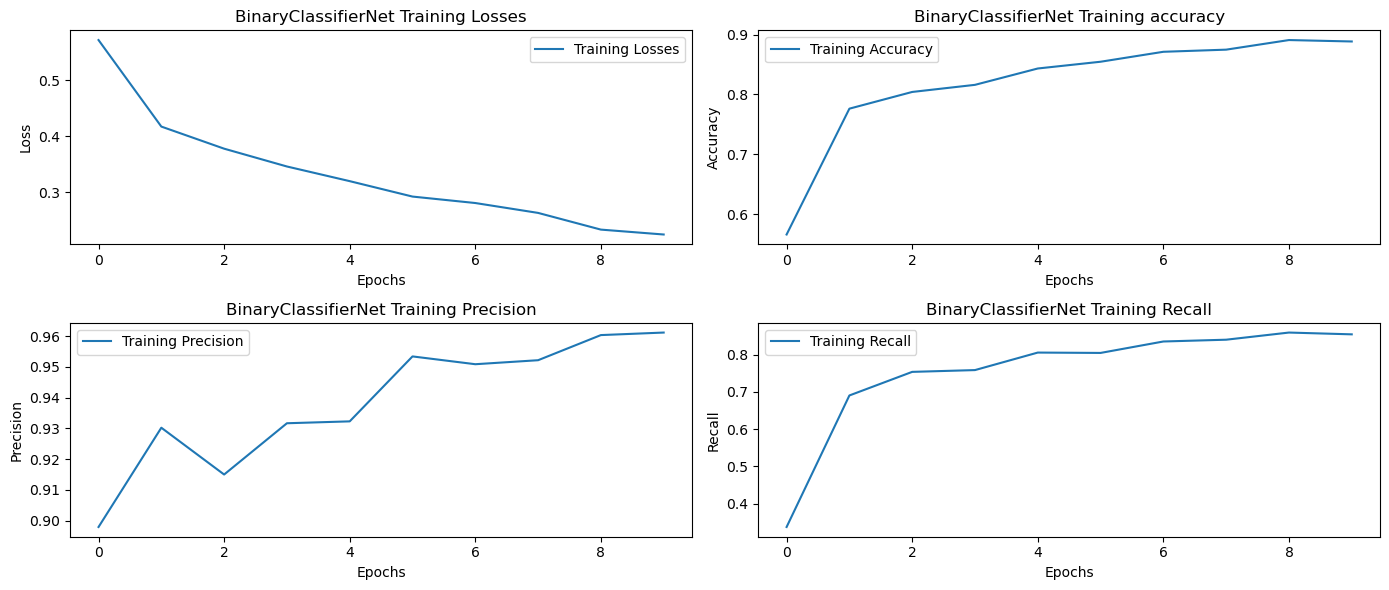

In [9]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BinaryClassifierNet Training Losses')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BinaryClassifierNet Training accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('BinaryClassifierNet Training Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('BinaryClassifierNet Training Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 81.00%
Precision: 0.87
Recall: 0.82
F1 Score: 0.84


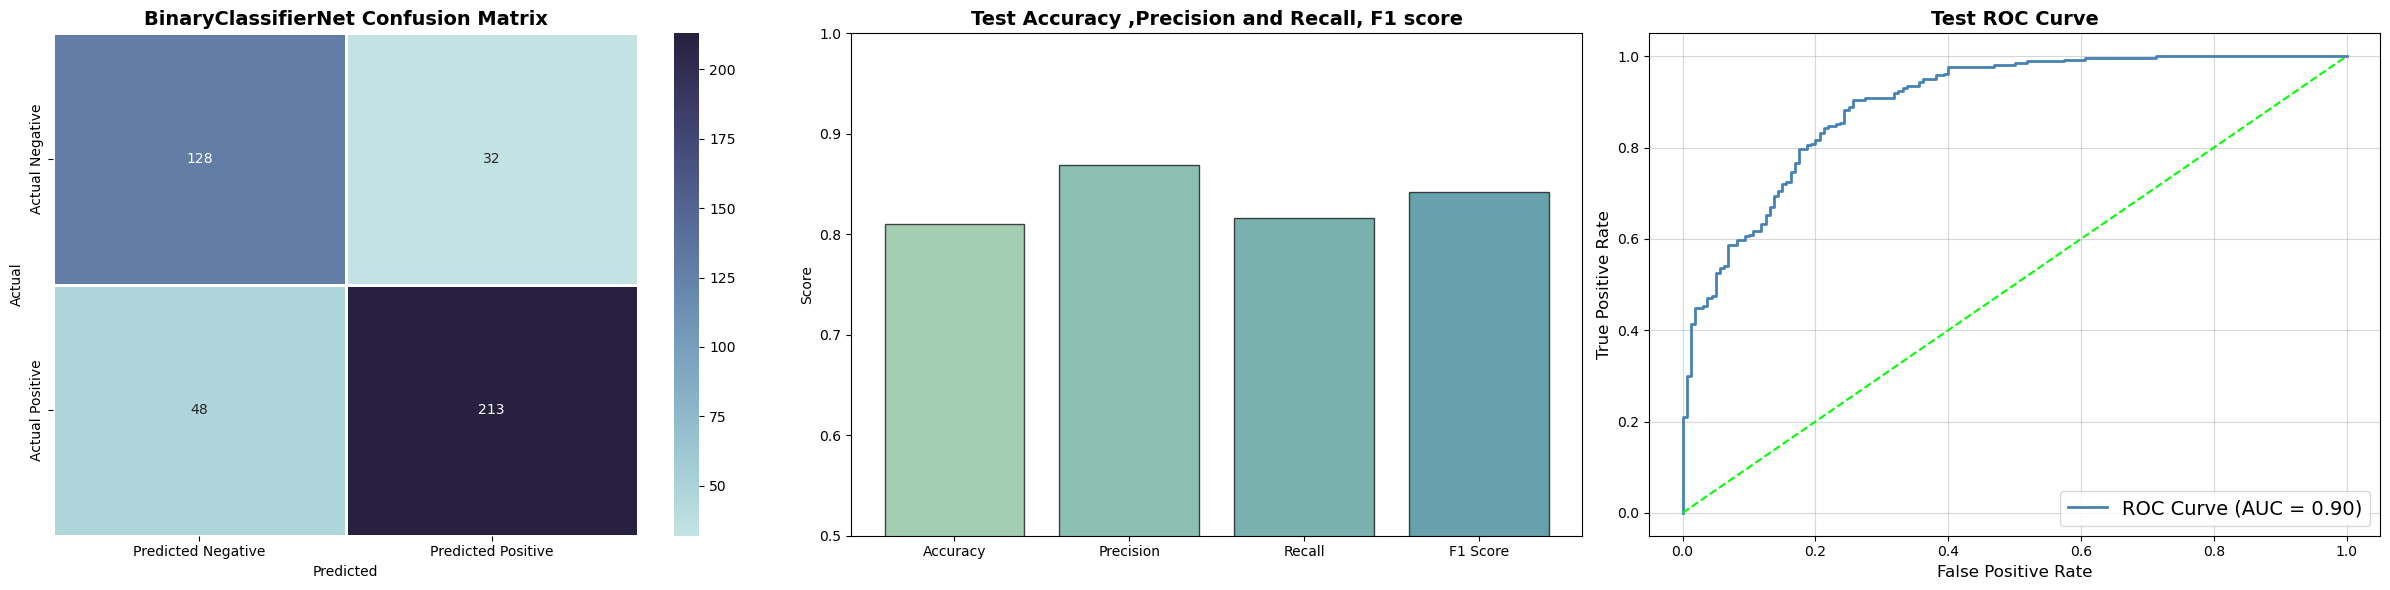

In [10]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []
all_prob=[]

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        # Save raw probabilities
        all_prob.extend(outputs.cpu().numpy())  

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_prob)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


### ImprovedDeepBinaryClassifierNet
A deeper version of the BinaryClassifierNet with 5 layers and featuring two Dropout layers to deactivate some neurons during the training phase to prevent overfitting of the network.


In [11]:
net = ImprovedDeepBinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [12]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.5906, Accuracy: 0.6205, Precision: 0.8108, Recall: 0.5053, F1 Score: 0.6226
Epoch 2, Training Loss: 0.4475, Accuracy: 0.7500, Precision: 0.8802, Recall: 0.6903, F1 Score: 0.7738
Epoch 3, Training Loss: 0.3870, Accuracy: 0.8046, Precision: 0.9151, Recall: 0.7546, F1 Score: 0.8271
Epoch 4, Training Loss: 0.3706, Accuracy: 0.8076, Precision: 0.9156, Recall: 0.7593, F1 Score: 0.8302
Epoch 5, Training Loss: 0.3028, Accuracy: 0.8420, Precision: 0.9370, Recall: 0.7987, F1 Score: 0.8623
Epoch 6, Training Loss: 0.3079, Accuracy: 0.8527, Precision: 0.9373, Recall: 0.8169, F1 Score: 0.8730
Epoch 7, Training Loss: 0.2929, Accuracy: 0.8557, Precision: 0.9405, Recall: 0.8188, F1 Score: 0.8754
Epoch 8, Training Loss: 0.2671, Accuracy: 0.8711, Precision: 0.9441, Recall: 0.8418, F1 Score: 0.8900
Epoch 9, Training Loss: 0.2374, Accuracy: 0.8860, Precision: 0.9600, Recall: 0.8514, F1 Score: 0.9024
Epoch 10, Training Loss: 0.2303, Accuracy: 0.8866, Precision: 0.9475, Recall: 0.86

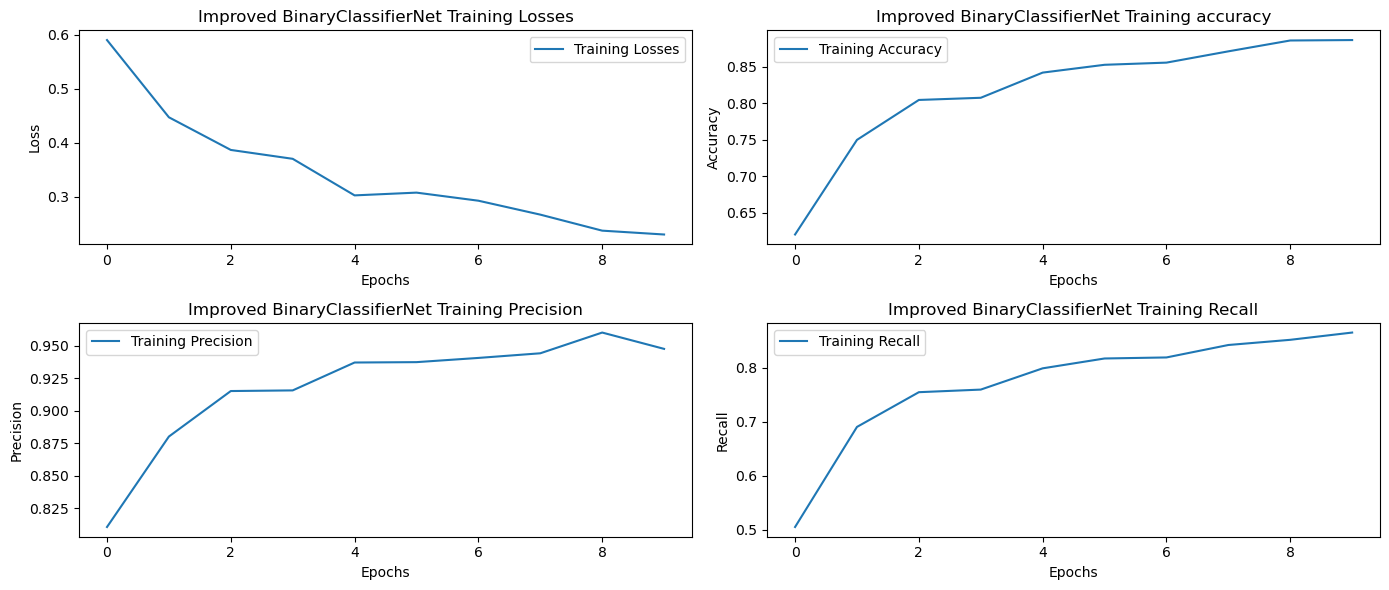

In [13]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Improved BinaryClassifierNet Training Losses')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improved BinaryClassifierNet Training accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Improved BinaryClassifierNet Training Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Improved BinaryClassifierNet Training Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 75.77%
Precision: 0.86
Recall: 0.72
F1 Score: 0.79


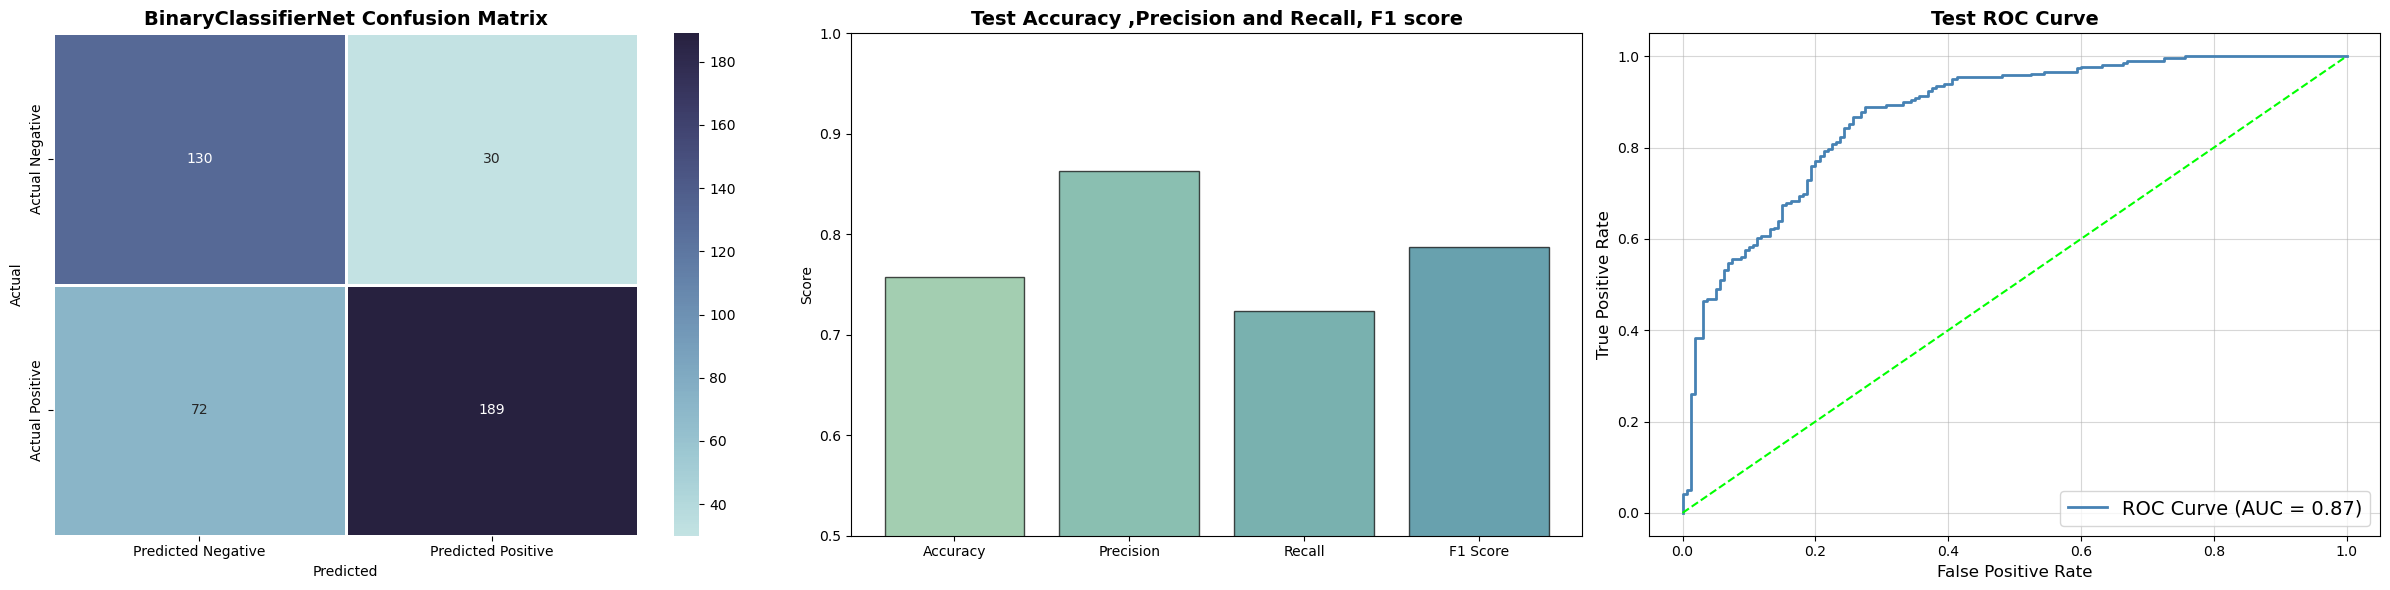

In [14]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []
all_prob=[]

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        # Save raw probabilities
        all_prob.extend(outputs.cpu().numpy())  

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_prob)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


## Considerations and critical issues

During the training, both networks showed performance fluctuations, maintaining a stable accuracy in the training phase between 0.8 and 0.9 toward the last epochs and with a test accuracy of 81.47% and 76.48%, respectively. Being a low-dimensional dataset, we tried to see if increasing the sample dimensions with oversampling techniques can achieve better results.

To address these issues, an oversampling technique called `Bootstrap` was used to increase the size of the dataset to 20,000 samples. This larger sample size allowed for the inclusion of a validation set, which helped monitor and prevent overfitting during training. In addition, the following adjustments were made to stabilize training:

- The `learning rate` was reduced from 0.001 to 0.0001;
- The `batch size` was increased from 32 to 64 to provide more stable gradient estimates

### Neural Network with Bootstrap

In [15]:
# Creates a bootstrap sample from 'df' with 20,000 samples, drawn with replacement.

df_bootstrap = resample(df, replace=True, n_samples=20000, random_state=42)

X = df_bootstrap.drop('Diagnosis', axis=1)
X = X.drop('DoctorInCharge', axis=1)
X= X.drop("PatientID", axis=1)
y = df_bootstrap['Diagnosis']

# Division into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting data to Pytorch tensors and sending to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


print(f"Size of X_train: {X_train_tensor.shape}")
print(f"Size of X_test: {X_test_tensor.shape}")

Size of X_train: torch.Size([16000, 32])
Size of X_test: torch.Size([4000, 32])


In [16]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [17]:
train_size = int(0.8 * len(train_dataset))  # 80% for traning set
val_size = len(train_dataset) - train_size  # 20% for the validation set

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 12800
Validation set size: 3200
Test set size: 4000


### BinaryClassifierNet 

In [18]:
net = BinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [19]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    all_val_labels = []
    all_val_preds = []

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Collect predictions and labels for metrics
            val_predicted = (val_outputs > 0.7).float()
            all_val_preds.extend(val_predicted.cpu().numpy())
            all_val_labels.extend(val_labels.cpu().numpy())

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate metrics for the validation epoch
    val_accuracy = sum([p == l for p, l in zip(all_val_preds, all_val_labels)]) / len(all_val_labels)
    val_precision = precision_score(all_val_labels, all_val_preds, average='binary')
    val_recall = recall_score(all_val_labels, all_val_preds, average='binary')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='binary')

    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.6022, Accuracy: 0.4719, Precision: 0.9498, Recall: 0.1470, F1 Score: 0.2545
Epoch 1, Validation Loss: 0.5072, Accuracy: 0.6416, Precision: 0.9548, Recall: 0.4394, F1 Score: 0.6019
Epoch 2, Training Loss: 0.4658, Accuracy: 0.6987, Precision: 0.9454, Recall: 0.5402, F1 Score: 0.6875
Epoch 2, Validation Loss: 0.4177, Accuracy: 0.7572, Precision: 0.9517, Recall: 0.6386, F1 Score: 0.7643
Epoch 3, Training Loss: 0.4006, Accuracy: 0.7683, Precision: 0.9356, Recall: 0.6683, F1 Score: 0.7797
Epoch 3, Validation Loss: 0.3722, Accuracy: 0.7963, Precision: 0.9558, Recall: 0.7020, F1 Score: 0.8095
Epoch 4, Training Loss: 0.3662, Accuracy: 0.8004, Precision: 0.9393, Recall: 0.7213, F1 Score: 0.8160
Epoch 4, Validation Loss: 0.3448, Accuracy: 0.8275, Precision: 0.9494, Recall: 0.7608, F1 Score: 0.8447
Epoch 5, Training Loss: 0.3425, Accuracy: 0.8231, Precision: 0.9400, Recall: 0.7602, F1 Score: 0.8406
Epoch 5, Validation Loss: 0.3273, Accuracy: 0.8297, Precision: 0.9601, Rec

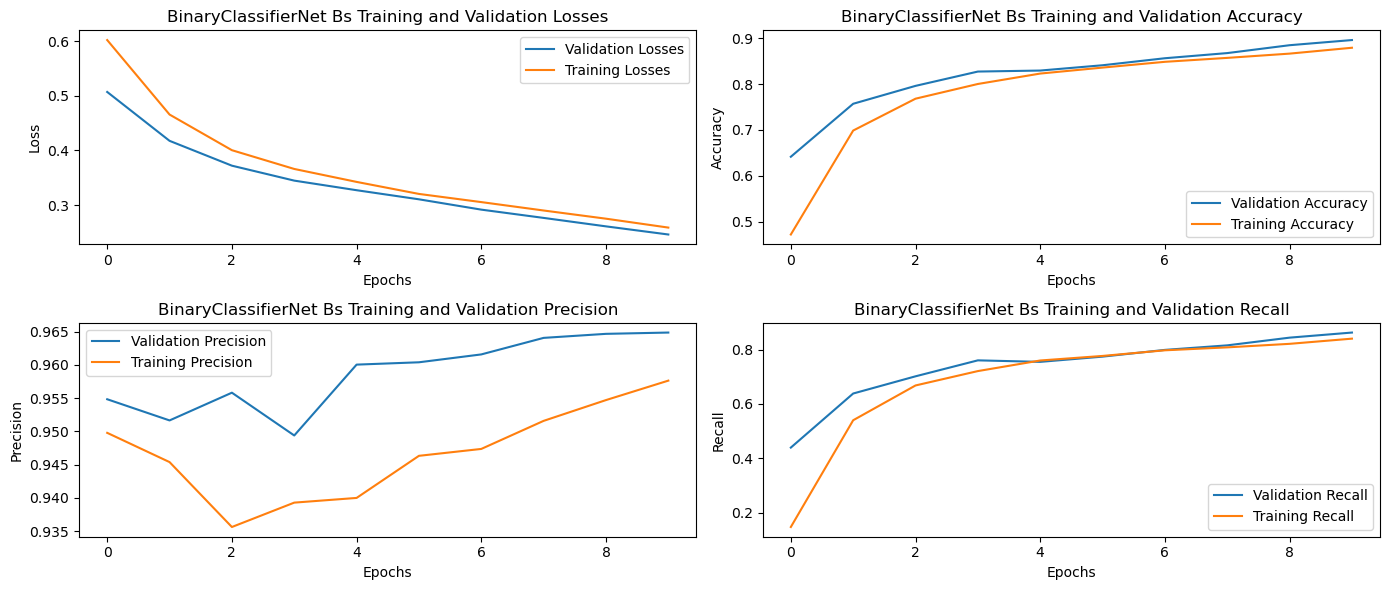

In [20]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(val_losses, label='Validation Losses')
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BinaryClassifierNet Bs Training and Validation Losses')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BinaryClassifierNet Bs Training and Validation Accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(val_precisions, label='Validation Precision')
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('BinaryClassifierNet Bs Training and Validation Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(val_recalls, label='Validation Recall')
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('BinaryClassifierNet Bs Training and Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 88.75%
Precision: 0.96
Recall: 0.85
F1 Score: 0.90


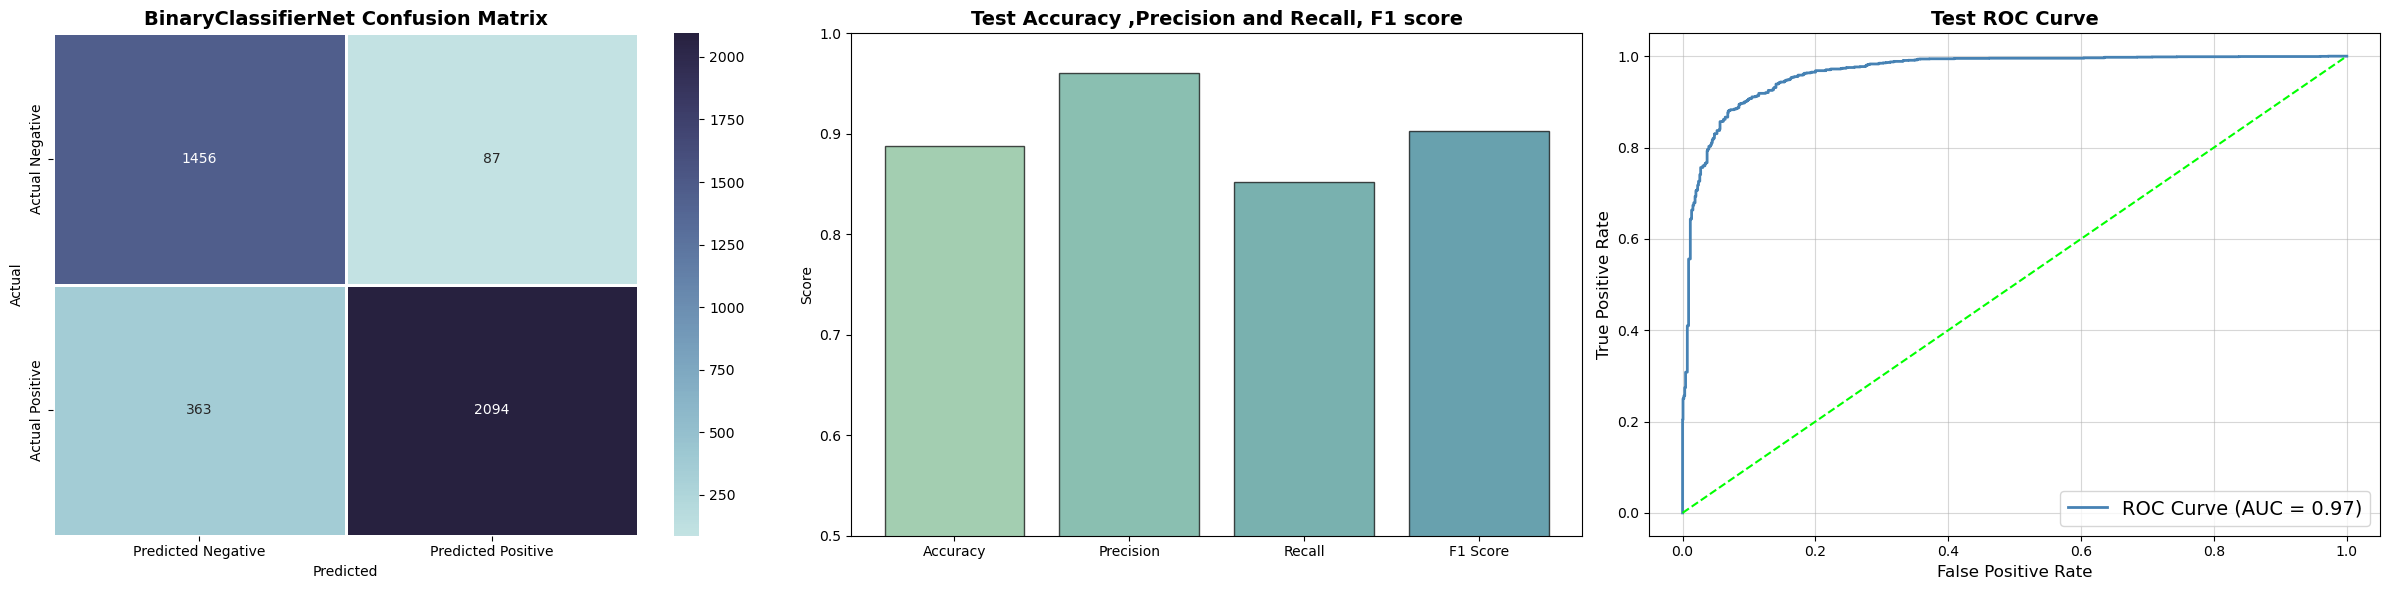

In [21]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []
all_prob=[]

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        # Save raw probabilities
        all_prob.extend(outputs.cpu().numpy())  

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_prob)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


### Improved BinaryClassifierNet 

In [34]:
net = ImprovedDeepBinaryClassifierNet().to(device)
criterion =  nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [35]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    all_train_labels = []
    all_train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        # Collect predictions and labels for metrics
        preds = (outputs > 0.7).float()
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate metrics for the training epoch
    train_accuracy = sum([p == l for p, l in zip(all_train_preds, all_train_labels)]) / len(all_train_labels)
    train_precision = precision_score(all_train_labels, all_train_preds, average='binary')
    train_recall = recall_score(all_train_labels, all_train_preds, average='binary')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')

    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    all_val_labels = []
    all_val_preds = []

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Collect predictions and labels for metrics
            val_predicted = (val_outputs > 0.7).float()
            all_val_preds.extend(val_predicted.cpu().numpy())
            all_val_labels.extend(val_labels.cpu().numpy())

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate metrics for the validation epoch
    val_accuracy = sum([p == l for p, l in zip(all_val_preds, all_val_labels)]) / len(all_val_labels)
    val_precision = precision_score(all_val_labels, all_val_preds, average='binary')
    val_recall = recall_score(all_val_labels, all_val_preds, average='binary')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='binary')

    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")

print('Finished Training')


Epoch 1, Training Loss: 0.5970, Accuracy: 0.5634, Precision: 0.8433, Recall: 0.3543, F1 Score: 0.4989
Epoch 1, Validation Loss: 0.4664, Accuracy: 0.6841, Precision: 0.9538, Recall: 0.5124, F1 Score: 0.6667
Epoch 2, Training Loss: 0.4468, Accuracy: 0.7416, Precision: 0.9079, Recall: 0.6441, F1 Score: 0.7536
Epoch 2, Validation Loss: 0.3687, Accuracy: 0.7756, Precision: 0.9611, Recall: 0.6629, F1 Score: 0.7846
Epoch 3, Training Loss: 0.3747, Accuracy: 0.8013, Precision: 0.9217, Recall: 0.7388, F1 Score: 0.8202
Epoch 3, Validation Loss: 0.3142, Accuracy: 0.8228, Precision: 0.9649, Recall: 0.7395, F1 Score: 0.8373
Epoch 4, Training Loss: 0.3313, Accuracy: 0.8302, Precision: 0.9315, Recall: 0.7807, F1 Score: 0.8495
Epoch 4, Validation Loss: 0.2771, Accuracy: 0.8409, Precision: 0.9662, Recall: 0.7689, F1 Score: 0.8563
Epoch 5, Training Loss: 0.2899, Accuracy: 0.8569, Precision: 0.9441, Recall: 0.8150, F1 Score: 0.8748
Epoch 5, Validation Loss: 0.2385, Accuracy: 0.8641, Precision: 0.9747, Rec

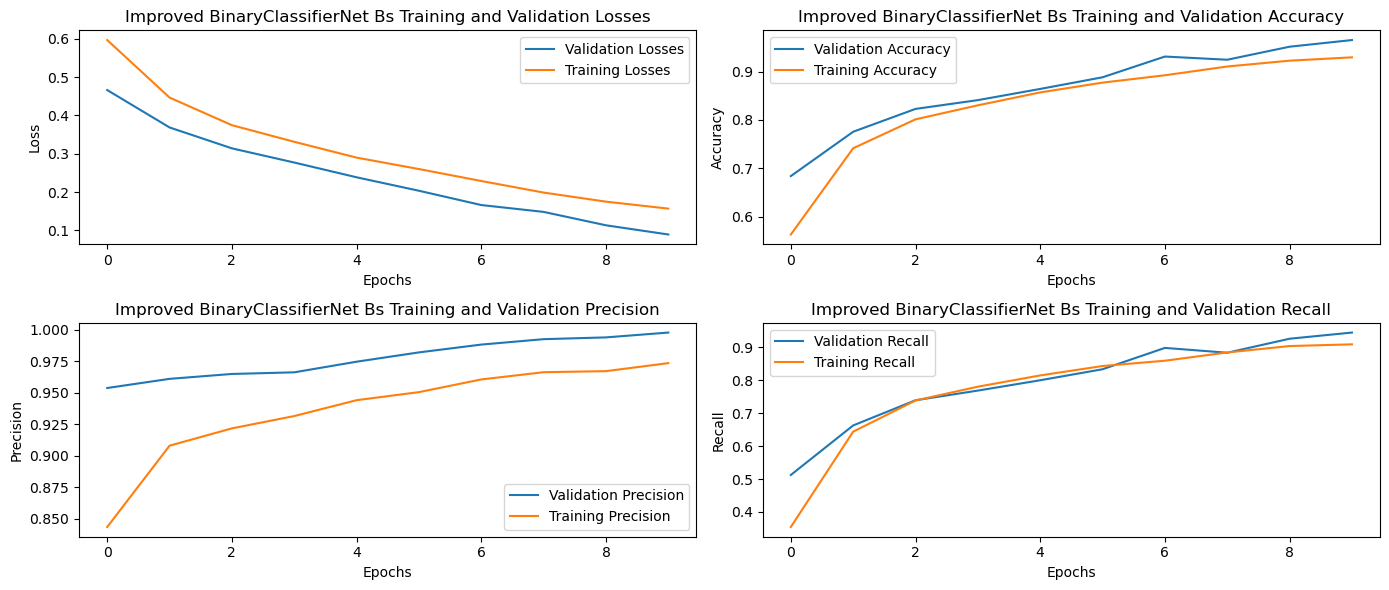

In [36]:
# Plotting metrics
plt.figure(figsize=(14, 6))

# First subplot (Training and Validation Losses)
plt.subplot(2, 2, 1)
plt.plot(val_losses, label='Validation Losses')
plt.plot(train_losses, label='Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Improved BinaryClassifierNet Bs Training and Validation Losses')
plt.legend()

# Second subplot (Training and Validation Accuracy)
plt.subplot(2, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improved BinaryClassifierNet Bs Training and Validation Accuracy')
plt.legend()

# Third subplot (Training and Validation Precision)
plt.subplot(2, 2, 3)
plt.plot(val_precisions, label='Validation Precision')
plt.plot(train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Improved BinaryClassifierNet Bs Training and Validation Precision')
plt.legend()

# Fourth subplot (Training and Validation Recall)
plt.subplot(2, 2, 4)
plt.plot(val_recalls, label='Validation Recall')
plt.plot(train_recalls, label='Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Improved BinaryClassifierNet Bs Training and Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy on the test set: 96.78%
Precision: 1.00
Recall: 0.95
F1 Score: 0.97


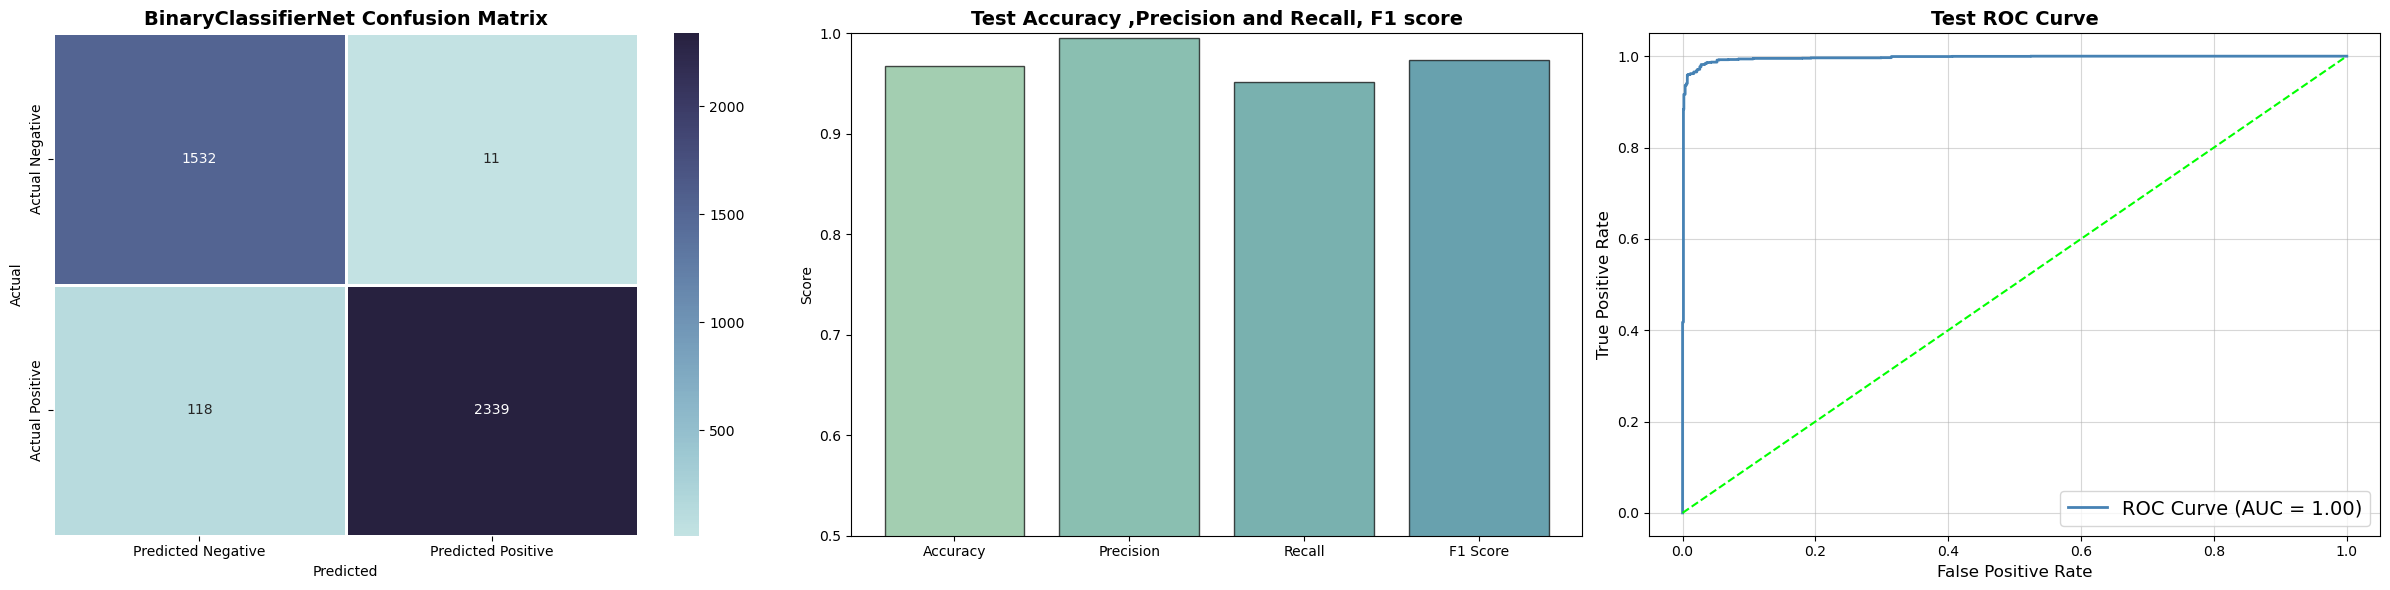

In [37]:
# Evaluate on Test Set
correct = 0
total = 0
all_predictions = []
all_labels = []
all_prob=[]

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        # Transfer data to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        # Save raw probabilities
        all_prob.extend(outputs.cpu().numpy())  

        # Binary classification: use a threshold of 0.7 to decide the class
        predicted = (outputs > 0.7).float()

        # Add predictions and labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')
accuracy= correct / total

# Print accuracy and other metrics
print(f'Accuracy on the test set: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
fpr, tpr, thresholds = roc_curve(all_labels, all_prob)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(24, 6))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], linewidths=1, linecolor="white")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BinaryClassifierNet Confusion Matrix', fontsize=14, weight="bold")

plt.subplot(1,3,2)

plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1], color=sns.color_palette("crest", as_cmap=False),edgecolor="black",alpha=0.7)
plt.ylabel('Score')
plt.ylim(0.5,1.0)
plt.title('Test Accuracy ,Precision and Recall, F1 score',fontsize=14, weight="bold")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Test ROC Curve', fontsize=14, weight="bold")
plt.legend(loc='lower right',fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


<h5> The results obtained demonstrate that before the application of the Bootstrap the simplest neural network obtained better results than the other. With a sample dimensionality as expected the Improved BinaryClassifierNet obtains better results in all metrics. Probably with a larger dataset it was possible to obtain better results with the use of neural networks for binary classification. 


For a medical context it would be ideal to obtain results around 90-99% as metrics.
However, it must be considered that these oversampling techniques are often not very effective, as they are not able to "create" new information that is not already contained in the initial dataset. <h5>